<a href="https://colab.research.google.com/github/KazaGeetanjali/GIScode/blob/main/PS2_Kaza_Geetanjali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok:

Number of Women CEOs per Sector--very good--but not number but percent
https://www.google.com/search?sca_esv=576211123&rlz=1CAKDZI_enUS997US997&sxsrf=AM9HkKmthVBDY6We9iPdUghh3L1tUs5r8g:1698177789364&q=matplotlib+percent+women&tbm=isch&source=lnms&sa=X&ved=2ahUKEwjZxJmfvY-CAxVNM1kFHYSpClcQ0pQJegQIDRAB&biw=1706&bih=835&dpr=1.13#imgrc=PbedrtdLHBdqRM

too many graphs! (for presentation) [yes, do have many graphs, but present only like 5]

interesting area

## **RESEARCH INTEREST**

 The term Fortune refers to a list of the largest companies compiled by Fortune magazine every year. Companies are ranked by their annual revenues for their respective fiscal years. This list includes both public and private companies using publicly available revenue data. A job with a Fortune employer is a different world from most other employers. Usually, Company names are very well known, across many states or even the globe. That can be very good for one's career. Some of these companies are so consistent with their annual revenues that they understand that their workforce is a key to their success. Many of the Fortune are included on the CNN Money’s list of best companies to work for.

### ***PROJECT***

In this project we will see the graphical representation of Fortune all over the world with respect there revenues, profits, number of employees in each organization. We will also plot the headquarters of each company.

**Data Source:** Utilizing data from someka website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees of the Fortune companies

**Datalink:**
Fortune Website: https://fortune.com/

Texas Attracts Big Businesses: https://www.cnbc.com/2021/03/20/how-texas-attracts-big-businesses-billionaires-from-california.html

Women CEO : https://fortune.com/2021/06/02/female-ceos-fortune-500-2021-women-ceo-list-roz-brewer-walgreens-karen-lynch-cvs-thasunda-brown-duckett-tiaa/

Financial Sector: https://www.investopedia.com/terms/f/financial_sector.asp

Holding Company: https://www.investopedia.com/terms/h/holdingcompany.asp

# **PS1**

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import folium
import plotly.express as px

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:
import plotly.offline as py
import seaborn as sns
import numpy as np # linear algebra
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [ ]:
from shapely.geometry import Point

### ***Geographic map of the world boundaries***
We will import the shape file from internet and plot a world shape file.

In [ ]:
! wget -q -O world-administrative-boundaries.zip https://docs.google.com/uc?id=1Nhciw6gPCoA6L98N4Kw0fKNT-Caf4e8_&export=download

zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
world_boundaries=gpd.read_file('world-administrative-boundaries.shp') #load the shapefile with gpd as world_boundaries

checking the data types of the world boundaries

In [ ]:
world_boundaries.dtypes

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [ ]:
world_boundaries.columns #displaying the columns of the world boundaries dataframe

Index(['iso3', 'status', 'color_code', 'name', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

<Axes: >

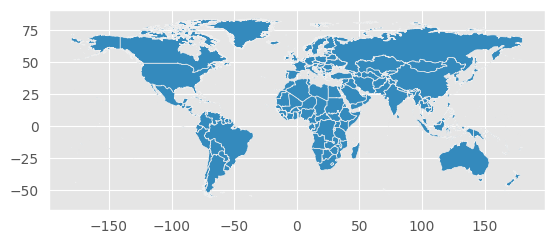

In [ ]:
world_boundaries.plot() #ploting the world map

***Importing data of fortune 500 companies all over the world***

Here we import the fortune 500 companies data from the someka website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees. We are importing this file from GitHub using `!wget`.

In [ ]:
! wget -q -O Fortune-500.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune-500.csv

Fortune_500_Dataset = pd.read_csv("Fortune-500.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
Fortune_500_Dataset.head() #Displaying rows

Rank              Company Name       Country  Number of Employees  \
0     1                   Walmart          U.S.              2100000   
1     2              Saudi Aramco  Saudi Arabia                70496   
2     3                State Grid         China               870287   
3     4                    Amazon          U.S.              1541000   
4     5  China National Petroleum         China              1087049   

  Previous Rank  Revenues ($millions) Revenue Change  Profits ($millions)  \
0             1                611289          0.067                11680   
1             6                603651          0.508               159069   
2             3                530009          0.151                 8192   
3             2                513983          0.094                -2722   
4             4                483019          0.173                21080   

  Profit Change  Assets ($millions)  
0        -0.146              243197  
1          0.51              663541  
2         0.148              710763  
3        -1.082              462675  
4         1.187              637223

In [ ]:
Fortune_500_Dataset.columns #displaying the columns before the merge

Index(['Rank', 'Company Name', 'Country', 'Number of Employees',
       'Previous Rank', 'Revenues ($millions)', 'Revenue Change',
       'Profits ($millions)', 'Profit Change', 'Assets ($millions)'],
      dtype='object')

## **Changing both DataFrames to create Join/Merge**

To create a merge we change the country names to upper case and remove any leading or tailing spaces, replace specail charaters if present.

We also change the column name so that both dataframes have the same column names for country.

We also change the value for country column so that both dataframes are inline with each other

In [ ]:
world_boundaries['name'] = world_boundaries['name'].str.upper().str.replace(' ', '').str.replace('.', '') #making the column data similar to the other data to merge on this column
Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].str.upper().str.replace(' ', '').str.replace('.', '') #turning the column data to upper case and replacing special charaters with no space

<ipython-input-448-1ca8c91f9b58>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-448-1ca8c91f9b58>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
world_boundaries = world_boundaries.rename(columns = {'name':'Country'}) #replacing the column name to create merge
world_boundaries.columns #printing the column names after renaming

Index(['iso3', 'status', 'color_code', 'Country', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

In [ ]:
world_boundaries['Country'] = world_boundaries['Country'].replace('UKOFGREATBRITAINANDNORTHERNIRELAND','BRITAIN').replace('REPUBLICOFKOREA','SOUTHKOREA').replace('RUSSIANFEDERATION','RUSSIA')  #replacing the column values to create merge
print(world_boundaries.Country.to_string(index=False))

               NORTHERNMARIANAISLANDS
                         KURILISLANDS
                               FRANCE
                               SERBIA
                              URUGUAY
                                 GUAM
                               PANAMA
                  NETHERLANDSANTILLES
                              ALGERIA
                                 TOGO
                       MA'TANAL-SARRA
                          SWITZERLAND
                               JERSEY
                              AUSTRIA
                             PORTUGAL
                           LUXEMBOURG
                           KAZAKHSTAN
                                ARUBA
                              HOLYSEE
                     EQUATORIALGUINEA
                              JAMAICA
                              ESTONIA
                                NIGER
                               BELIZE
                              MOROCCO
                                MALTA
            

In [ ]:
Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].replace('US','UNITEDSTATESOFAMERICA') #replacing the column values to create merge
print(Fortune_500_Dataset.Country.to_string(index=False)) #printing the column values after changing

UNITEDSTATESOFAMERICA
          SAUDIARABIA
                CHINA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
            SINGAPORE
                CHINA
UNITEDSTATESOFAMERICA
              GERMANY
              GERMANY
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                JAPAN
               FRANCE
          SWITZERLAND
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
           SOUTHKOREA
UNITEDSTATESOFAMERICA
               TAIWAN
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
          NETHERLANDS
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
               RUSSIA
                CHINA
                CHINA
                CHINA
                JAPAN
UNITEDSTAT

***Inner/Outer Merge***
Joining two data frames on the country column

*Inner Join:* An Inner Join returns only the matching rows between the two tables based on a specified condition.

*Outer Join:* An Outer Join returns all the rows from one table and matching rows from the other table based on a specified condition.

*Left Join:* All the records from the first Dataframe will be displayed, irrespective of whether the keys in the first Dataframe can be found in the second Dataframe

*Right Join:* All the records from the second Dataframe will be displayed.


In [ ]:
Fortune_inner_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'inner', indicator = True) #inner join based on country column

Fortune_outer_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'outer', indicator = True)  #outer join based on country column

Fortune_right_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'right', indicator = True)  #right join based on country column

Fortune_left_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'left', indicator = True)  #left join based on country column

Fortune_inner_join[['Company Name','Country','Revenues ($millions)']]

Company Name    Country  Revenues ($millions)
0                            TotalEnergies     FRANCE                263310
1                    Electricité de France     FRANCE                150902
2                                    Engie     FRANCE                109175
3                                      AXA     FRANCE                109067
4                                Carrefour     FRANCE                 90062
..                                     ...        ...                   ...
495  Xinjiang Guanghui Industry Investment      CHINA                 30922
496                               Petronas   MALAYSIA                 85365
497                                  Volvo     SWEDEN                 46828
498                              BHP Group  AUSTRALIA                 71502
499                       Woolworths Group  AUSTRALIA                 44126

[500 rows x 3 columns]

In [ ]:
Fortune_inner_join_csv = pd.DataFrame(Fortune_inner_join)

# Save the dataframe to a CSV file
Fortune_inner_join_csv.to_csv('Fortune_inner_join.csv', index=False)

In [ ]:
# computing number of rows
row_inner = len(Fortune_inner_join.axes[0])

# computing number of columns
cols_inner = len(Fortune_inner_join.axes[1])

print("Number of Rows: ", row_inner)
print("Number of Columns: ", cols_inner)

Number of Rows:  500
Number of Columns:  19


In [ ]:
Fortune_inner_join.dtypes #checking the data types after the join

iso3                      object
status                    object
color_code                object
Country                   object
continent                 object
region                    object
iso_3166_1_               object
french_shor               object
geometry                geometry
Rank                       int64
Company Name              object
Number of Employees        int64
Previous Rank             object
Revenues ($millions)       int64
Revenue Change            object
Profits ($millions)        int64
Profit Change             object
Assets ($millions)         int64
_merge                  category
dtype: object

<Axes: >

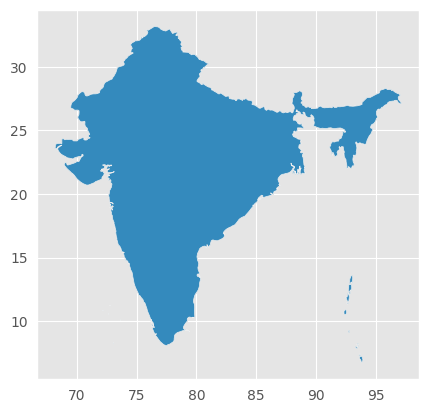

In [ ]:
Fortune_inner_join.loc[Fortune_inner_join['Country']=="INDIA"].plot() #ploting an individual map after the merge

## **Ploting based on company revenues**
Revenues are as reported, including revenues from discontinued operations when published. If a spin-off is on the list, it has not been included in discontinued operations. Revenues for commercial banks includes interest and noninterest revenues. Revenues for insurance companies include premium and annuity income, investment income, and capital gains or losses, but exclude deposits. Revenue figures for all companies include consolidated subsidiaries and exclude excise taxes.

Ploting the map based on the revenue for each company in fortune 500 list

<Axes: >

[]

[]

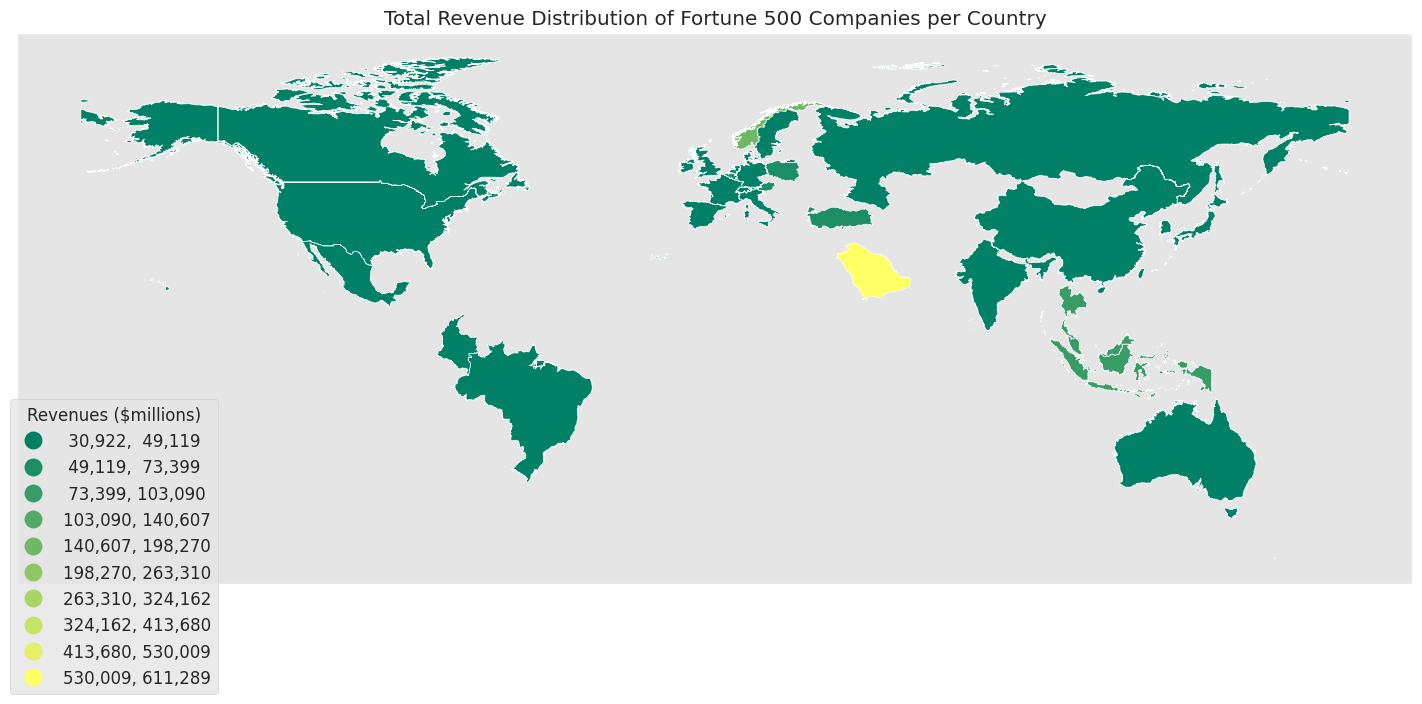

In [ ]:
#ploting the inner join dataframe
fig, ax = plt.subplots(figsize=(18,12))  #sets the sze of the map
Fortune_inner_join.plot(ax=ax,
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='summer', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.15, 0.35),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':'large'})  #customizing the legend

legend_details = ax.get_legend()
legend_details.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()


Ploting the map based on the outer merge to see the countries which are not having any fortune 500 companies

In [ ]:
Fortune_outer_join._merge.value_counts() #counts the division of the merges

both          500
left_only     223
right_only      0
Name: _merge, dtype: int64

In [ ]:
Fortune_outer_join.isnull().any() #checks for the fields which are not having any value(NaN) in there columns

iso3                     True
status                   True
color_code               True
Country                 False
continent               False
region                   True
iso_3166_1_              True
french_shor             False
geometry                False
Rank                     True
Company Name             True
Number of Employees      True
Previous Rank            True
Revenues ($millions)     True
Revenue Change           True
Profits ($millions)      True
Profit Change            True
Assets ($millions)       True
_merge                  False
dtype: bool

In [ ]:
Fortune_outer_join.Country[Fortune_outer_join._merge!='both'] #checking if there is any problem to the values which did not merge

0                    NORTHERNMARIANAISLANDS
1                              KURILISLANDS
26                                   SERBIA
27                                  URUGUAY
28                                     GUAM
                       ...                 
718                            BOUVETISLAND
719    THEFORMERYUGOSLAVREPUBLICOFMACEDONIA
720                                    PERU
721                                   BENIN
722                                PARAGUAY
Name: Country, Length: 223, dtype: object

In [ ]:
Fortune_outer_join_plot = Fortune_outer_join.fillna(value = 0) #after checking if there is no problem fill the column values with 0

In [ ]:
Fortune_outer_join_profit = Fortune_outer_join_plot

In [ ]:
Fortune_outer_join_plot[['Country', 'Revenues ($millions)', 'Profits ($millions)']]

Country  Revenues ($millions)  \
0                  NORTHERNMARIANAISLANDS                   0.0   
1                            KURILISLANDS                   0.0   
2                                  FRANCE              263310.0   
3                                  FRANCE              150902.0   
4                                  FRANCE              109175.0   
..                                    ...                   ...   
718                          BOUVETISLAND                   0.0   
719  THEFORMERYUGOSLAVREPUBLICOFMACEDONIA                   0.0   
720                                  PERU                   0.0   
721                                 BENIN                   0.0   
722                              PARAGUAY                   0.0   

     Profits ($millions)  
0                    0.0  
1                    0.0  
2                20526.0  
3               -18869.0  
4                  227.0  
..                   ...  
718                  0.0  
719                  0.0  
720                  0.0  
721                  0.0  
722                  0.0  

[723 rows x 3 columns]

<Axes: >

[]

[]

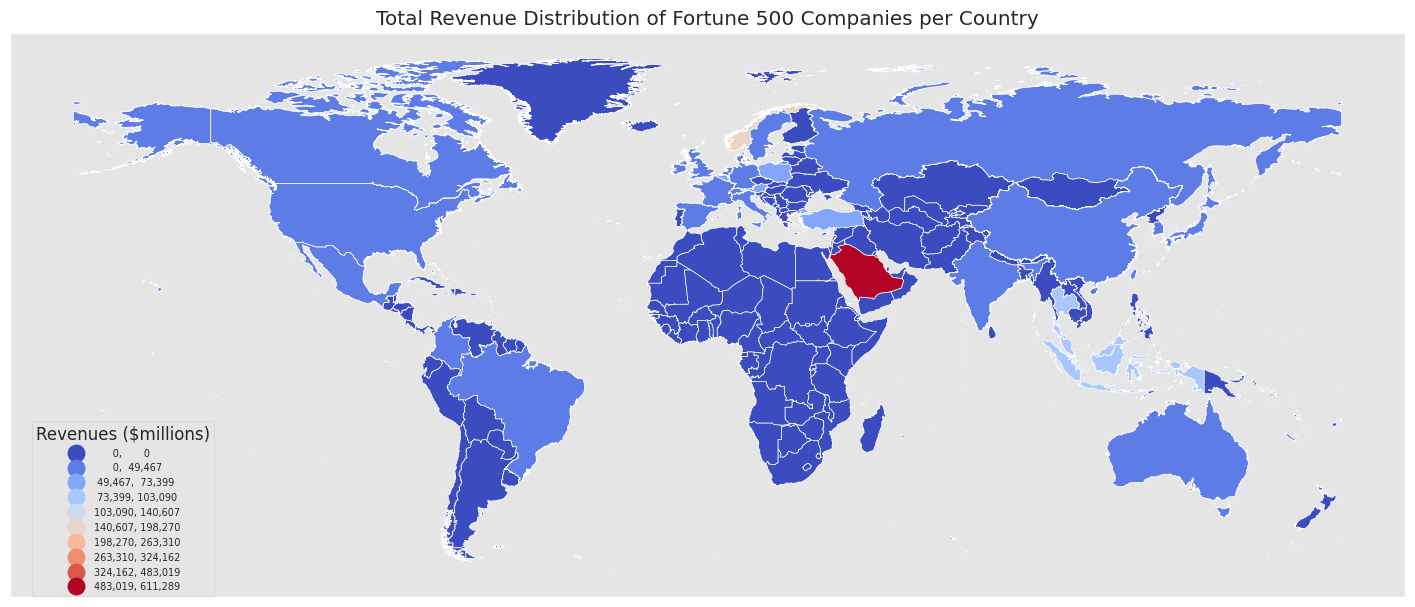

In [ ]:
#ploting the outer join dataframe
fig, ax = plt.subplots(figsize=(18,12))  #sets the sze of the map
Fortune_outer_join_plot.plot(ax=ax,
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='coolwarm', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.15, 0.32),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':7})  #customizing the legend

legend_details_outer = ax.get_legend()
legend_details_outer.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

## ***Subploting (ploting 2 maps side by side)***

*Revenues*

Revenues are as reported, including revenues from discontinued operations when published. If a spin-off is on the list, it has not been included in discontinued operations

*Profits*

Profits are shown after taxes, extraordinary credits or charges, cumulative effects of accounting changes, and noncontrolling interests (including subsidiary preferred dividends), but before preferred dividends of the company. Profits for real estate investment trusts, partnerships, and cooperatives are reported but are not comparable with those of the other companies on the list because they are not taxed on a comparable basis. Profits for mutual insurance companies are based on statutory accounting.

We will use the option of subploting to compare which country is making more revenue and profit by ploting them side by side

<Axes: >

[]

[]

<Axes: >

[]

[]

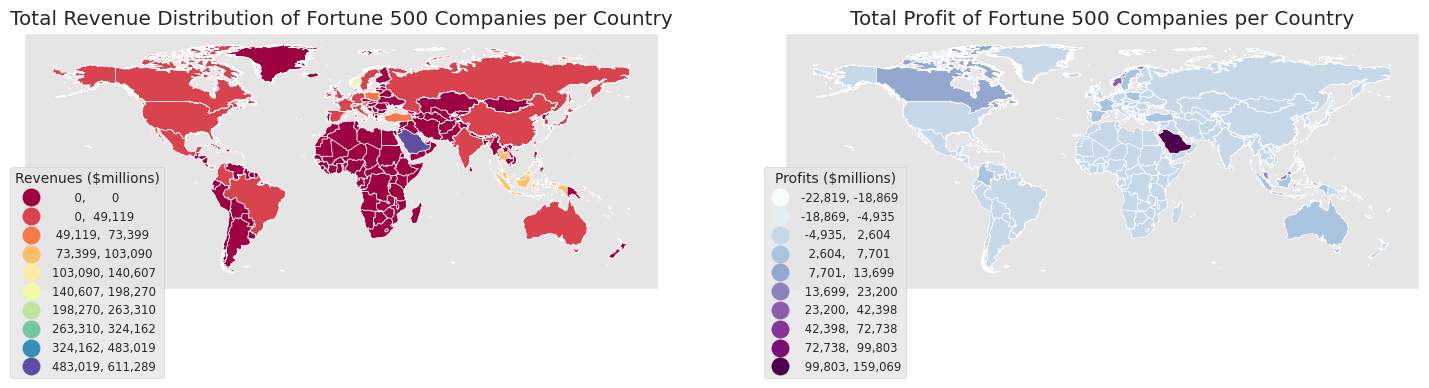

In [ ]:
fig, (ax,ax1) = plt.subplots( 1, 2, figsize=(18,12))

#fig, ax1 = plt.subplots(figsize=(18,12))  #sets the sze of the map
#sets the sze of the map
Fortune_outer_join_plot.plot(ax=ax,
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='Spectral', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.23, 0.5),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'medium',
                        'fontsize':'small'})  #customizing the legend

legend_details_outer = ax.get_legend()
legend_details_outer.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.show()

Fortune_outer_join_profit.plot(ax=ax1,
                        column='Profits ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='BuPu', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.2, 0.5),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'medium',
                        'fontsize':'small'})  #customizing the legend

legend_details_outer_profit = ax1.get_legend()
legend_details_outer_profit.set_title("Profits ($millions)") #setting the tittle for the legend
ax1.title.set_text("Total Profit of Fortune 500 Companies per Country") #setting the tittle for the map
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
#plt.show()

***Companies per country***

Counting how many companies are there for each country

Making a new dataframe with the countries and the count of companies per country

Merging the world boundaries and the count per country Ploting the map based on the number of companies for each country


In [ ]:
country_List = Fortune_inner_join['Country']

# converting the list to a Series and counting the values
country_count = pd.Series(country_List).value_counts()
country_count

UNITEDSTATESOFAMERICA    136
CHINA                    135
JAPAN                     41
GERMANY                   30
FRANCE                    24
SOUTHKOREA                18
BRITAIN                   15
CANADA                    14
SWITZERLAND               11
NETHERLANDS               10
BRAZIL                     9
SPAIN                      8
INDIA                      8
TAIWAN                     7
ITALY                      5
DENMARK                    3
SINGAPORE                  3
IRELAND                    3
MEXICO                     3
RUSSIA                     3
AUSTRALIA                  2
SAUDIARABIA                1
NORWAY                     1
INDONESIA                  1
BELGIUM                    1
THAILAND                   1
TURKEY                     1
COLOMBIA                   1
LUXEMBOURG                 1
AUSTRIA                    1
MALAYSIA                   1
SWEDEN                     1
POLAND                     1
Name: Country, dtype: int64

In [ ]:
country_count_df= country_count.to_frame(name='count_of_companies_country') #converting series to data frame
country_count_df['Country'] = country_count_df.index #changing the column name
country_count_df.columns

Index(['count_of_companies_country', 'Country'], dtype='object')

In [ ]:
country_count_df #checking dataframe

count_of_companies_country                Country
UNITEDSTATESOFAMERICA                         136  UNITEDSTATESOFAMERICA
CHINA                                         135                  CHINA
JAPAN                                          41                  JAPAN
GERMANY                                        30                GERMANY
FRANCE                                         24                 FRANCE
SOUTHKOREA                                     18             SOUTHKOREA
BRITAIN                                        15                BRITAIN
CANADA                                         14                 CANADA
SWITZERLAND                                    11            SWITZERLAND
NETHERLANDS                                    10            NETHERLANDS
BRAZIL                                          9                 BRAZIL
SPAIN                                           8                  SPAIN
INDIA                                           8                  INDIA
TAIWAN                                          7                 TAIWAN
ITALY                                           5                  ITALY
DENMARK                                         3                DENMARK
SINGAPORE                                       3              SINGAPORE
IRELAND                                         3                IRELAND
MEXICO                                          3                 MEXICO
RUSSIA                                          3                 RUSSIA
AUSTRALIA                                       2              AUSTRALIA
SAUDIARABIA                                     1            SAUDIARABIA
NORWAY                                          1                 NORWAY
INDONESIA                                       1              INDONESIA
BELGIUM                                         1                BELGIUM
THAILAND                                        1               THAILAND
TURKEY                                          1                 TURKEY
COLOMBIA                                        1               COLOMBIA
LUXEMBOURG                                      1             LUXEMBOURG
AUSTRIA                                         1                AUSTRIA
MALAYSIA                                        1               MALAYSIA
SWEDEN                                          1                 SWEDEN
POLAND                                          1                 POLAND

In [ ]:
FortuneCount_inner_join = pd.merge(world_boundaries, country_count_df, on = 'Country', how = 'inner', indicator = False) #inner merge

FortuneCount_outer_join = pd.merge(world_boundaries, country_count_df, on = 'Country', how = 'outer', indicator = False) #outer merge

In [ ]:
companies_Per_Country= FortuneCount_inner_join[['Country','count_of_companies_country']] #displaying data

ploting Number of Fortune 500 Companies Per Country

<Axes: >

[]

[]

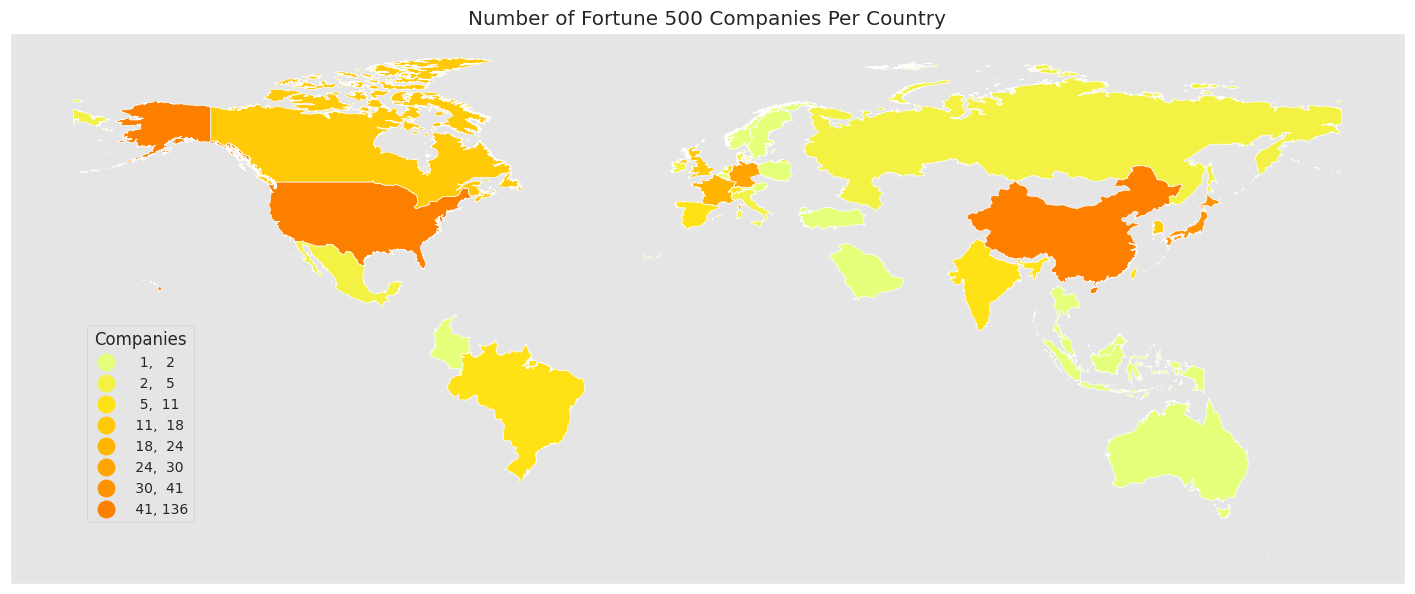

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
FortuneCount_inner_join.plot(ax=ax,
                        column='count_of_companies_country',
                        legend=True,
                        cmap='Wistia',
                        scheme='natural_breaks',
                        k=8,
                        edgecolor='w',
                        linewidth=0.5,
                        legend_kwds= {'bbox_to_anchor': (0.05, 0.1),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':10,'loc':'lower left'})
leg1 = ax.get_legend()
leg1.set_title("Companies")
ax.title.set_text("Number of Fortune 500 Companies Per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

## ***Company Headquaters Ploting***

Downloaded data of each company headquaters data of fortune 500 companies and
plotted circles based on number of employees

If circle is big that indicates that the number of employees in the company are high and if the circle is small which indicates that the employee are less in number

When you hower over the ploting we can see the data of the companies like rank,employees, website, county

data Link: https://hifld-geoplatform.opendata.arcgis.com/datasets/a4d813c396934fc09d0b801a0c491852/explore

In [ ]:
! wget -q -O Fortune_500_Corporate_Headquarters.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune_500_Corporate_Headquarters.csv

Fortune_500_Corporate_Address = pd.read_csv("Fortune_500_Corporate_Headquarters.csv", encoding='latin1') #reading datafile of headquater in form of CSV
Fortune_500_Corporate_Address.head()

ï»¿X             Y  FID  OBJECTID  RANK  \
0 -1.293321e+07  5.403709e+06    1         1    49   
1 -1.292942e+07  5.392879e+06    2         2   226   
2 -8.842930e+06  4.313449e+06    3         3   290   
3 -1.357618e+07  4.507432e+06    4         4   440   
4 -1.357871e+07  4.508509e+06    5         5   198   

                          NAME                   ADDRESS       ADDRESS2  \
0              ALBERTSONS COS.  250 PARKCENTER BOULEVARD  NOT AVAILABLE   
1            MICRON TECHNOLOGY    8000 SOUTH FEDERAL WAY  NOT AVAILABLE   
2  LABORATORY CORP. OF AMERICA     358 SOUTH MAIN STREET  NOT AVAILABLE   
3                 LAM RESEARCH      4650 CUSHING PARKWAY  NOT AVAILABLE   
4                       SYNNEX         44201 NOBEL DRIVE  NOT AVAILABLE   

         CITY STATE  ...      PRC COUNTYFIPS       COMMENTS  \
0       BOISE    ID  ...  ADDRESS      16001  NOT AVAILABLE   
1       BOISE    ID  ...  ADDRESS      16001  NOT AVAILABLE   
2  BURLINGTON    NC  ...  ADDRESS      37001  NOT AVAILABLE   
3     FREMONT    CA  ...  ADDRESS       6001  NOT AVAILABLE   
4     FREMONT    CA  ...  ADDRESS       6001  NOT AVAILABLE   

                         WEBSITE  PROFIT  \
0  HTTPS://WWW.ALBERTSONS.COM/#1  -502.2   
1        HTTPS://WWW.MICRON.COM/  -276.0   
2       HTTPS://WWW.LABCORP.COM/   732.1   
3   HTTPS://WWW.LAMRESEARCH.COM/   914.0   
4    HTTPS://WWW.SYNNEXCORP.COM/   234.9   

                                 GlobalID            CreationDate  \
0  {A7574C1C-884F-48A8-A612-51202F5036DF}  2021/12/16 14:56:43+00   
1  {3C4FFBAF-B76E-435E-9B5F-D93C995F5720}  2021/12/16 14:56:43+00   
2  {95021691-694A-4761-90C9-E5E1DE52DC1F}  2021/12/16 14:56:43+00   
3  {1C7A6B3E-5EB8-46D7-81B9-E1A6113187A2}  2021/12/16 14:56:43+00   
4  {D8F8FE15-E3C1-4848-8D28-141470CE17F5}  2021/12/16 14:56:43+00   

         Creator                EditDate         Editor  
0  HostedByHIFLD  2021/12/16 14:56:43+00  HostedByHIFLD  
1  HostedByHIFLD  2021/12/16 14:56:43+00  HostedByHIFLD  
2  HostedByHIFLD  2021/12/16 14:56:43+00  HostedByHIFLD  
3  HostedByHIFLD  2021/12/16 14:56:43+00  HostedByHIFLD  
4  HostedByHIFLD  2021/12/16 14:56:43+00  HostedByHIFLD  

[5 rows x 27 columns]

In [ ]:
Fortune_500_Corporate_Address.dtypes #checking data types

ï»¿X            float64
Y               float64
FID               int64
OBJECTID          int64
RANK              int64
NAME             object
ADDRESS          object
ADDRESS2         object
CITY             object
STATE            object
ZIP               int64
COUNTY           object
EMPLOYEES         int64
REVENUES          int64
LATITUDE        float64
LONGITUDE       float64
SOURCE           object
PRC              object
COUNTYFIPS        int64
COMMENTS         object
WEBSITE          object
PROFIT          float64
GlobalID         object
CreationDate     object
Creator          object
EditDate         object
Editor           object
dtype: object

In [ ]:
Fortune_500_Corporate_Address = Fortune_500_Corporate_Address.rename(columns = {'ï»¿X':'X'})

setting the values of longittude and latitude into variables to access the further

In [ ]:
longi= Fortune_500_Corporate_Address['LONGITUDE']
lat = Fortune_500_Corporate_Address['LATITUDE']

Plotting circles on the map in the form of number of employees

big circle indicates huge number of employees

small circle indicates less number of employees

When hover over we can find addtional data related to the each companies

In [ ]:
fig = px.scatter_mapbox(Fortune_500_Corporate_Address, #calling the data frame where the headquaters details are stored
                        lat="LATITUDE", #setting the latitude details
                        lon="LONGITUDE", #setting the longitude details
                        hover_name="NAME", #assigning the hover name
                        hover_data=["RANK","EMPLOYEES","WEBSITE","COUNTY"], #assigning addtional hover data
                        zoom=3,
                        height=600,
                        size= 'EMPLOYEES', #setting the attribute for ploting
                        opacity=0.8,
                        width=1300)
fig.update_layout(mapbox_style='stamen-terrain',title_text="Number of employees per Fortune 500 Company") #setting tittle for the map

## ***Plotting bar graph***

Plotting bar graph based number of employees working in headquaters per each state

In [ ]:
Fortune_500_Total_EMPLOYEES = Fortune_500_Corporate_Address["EMPLOYEES"]
Fortune_500_NAME = Fortune_500_Corporate_Address["STATE"]
Fortune_500_RANK = Fortune_500_Corporate_Address["RANK"]

<BarContainer object of 500 artists>

Text(0.5, 1.0, 'Number of employees per each state')

Text(0.5, 0, 'Employees')

Text(0, 0.5, 'States')

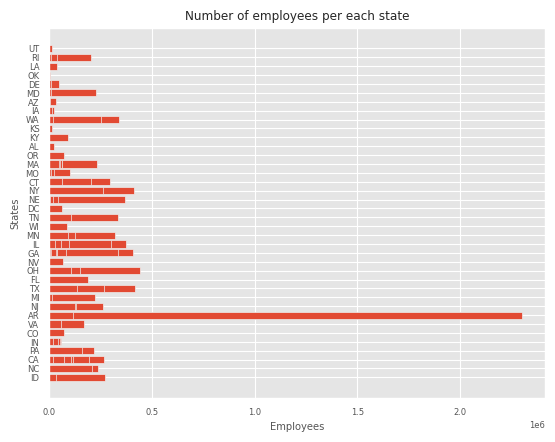

In [ ]:
plt.rc('font', size=6) #setting the size of the map
plt.barh(Fortune_500_NAME,Fortune_500_Total_EMPLOYEES) #plotting a bar graph based on the state and the employees
plt.title("Number of employees per each state")
plt.xlabel("Employees")
plt.ylabel("States")

**Marking Headquaters on different types of maps**

Marking headquaters of fortune 500 companies on different kind of maps like Openstreet map, google maps, Google Satellite, Google Satellite Hybrid, Google Terrain, Stamenwatercolor maps

Customizing the differnet type of maps and then marking them on the map based on the company name column

In [ ]:
mapObj= folium.Map(
    location=[35.6912809,-116.9880973],
    zoom_start=4)
folium.TileLayer('openstreetmap').add_to(mapObj) #customizing differnet kind of maps attributes
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(mapObj)
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Maps').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Satellite').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Terrain').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Satellite Hybrid').add_to(mapObj)
for row in range(len(Fortune_500_Corporate_Address)):
  #top 100 companies will be in green color and have a heart icon
  if Fortune_500_Corporate_Address.loc[row, "RANK"] <=100:
    website="<h5>Check out website for more <a href=" +Fortune_500_Corporate_Address.loc[row, "WEBSITE"]+ " target='_blank'>here</a></h5>"
    folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='heart', prefix='fa', color='green'),
              popup=folium.Popup(website, max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj) #marking headquaters on the different kind of maps based on the name
  #top 100 - 300 companies will be in blue color and have a star icon
  elif Fortune_500_Corporate_Address.loc[row, "RANK"] <=300:
    folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='star', prefix='fa', color='blue'),
              popup=folium.Popup(website, max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj) #marking headquaters on the different kind of maps based on the name
  #top 300 - 500 companies will be in red color and have a check icon
  else:
    folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='check', prefix='fa', color='red'),
              popup=folium.Popup(website, max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj) #marking headquaters on the different kind of maps based on the name
folium.LayerControl().add_to(mapObj)
mapObj

Making a list containing longitude and latitude

In [ ]:
list(zip(Fortune_500_Corporate_Address["LONGITUDE"],Fortune_500_Corporate_Address["LATITUDE"]))

[(-116.18099, 43.59974),
 (-116.14697, 43.52925),
 (-79.43739, 36.09317),
 (-121.95694, 37.4886),
 (-121.97965, 37.49628),
 (-121.89039, 37.71041),
 (-122.27237, 37.80348),
 (-80.2658, 40.50779),
 (-79.99485, 40.44136),
 (-80.00437, 40.43329),
 (-80.00051, 40.44129),
 (-80.00357, 40.43992),
 (-85.23743, 41.0411),
 (-104.89224, 39.60092),
 (-104.88214, 39.581553),
 (-104.86745, 39.5482),
 (-104.85536, 39.54506),
 (-104.84571, 39.55318),
 (-104.84571, 39.55318),
 (-104.84492, 39.54685),
 (-77.11261, 38.87985),
 (-77.07012, 38.89465),
 (-85.92326, 39.20402),
 (-94.21763, 36.36477),
 (-94.14745, 36.2453),
 (-74.1272, 40.89756),
 (-74.20762, 41.01613),
 (-74.17075, 41.07444),
 (-74.00657, 40.87398),
 (-86.44101, 42.14912),
 (-98.47939, 29.49244),
 (-98.42136, 29.624432),
 (-98.606, 29.58919),
 (-98.45941, 29.6161),
 (-98.573, 29.53455),
 (-80.63837, 28.0913),
 (-105.0992, 39.91172),
 (-105.14427, 39.9206),
 (-80.14419, 26.12002),
 (-74.80758, 40.09215),
 (-84.52325, 39.30823),
 (-84.42792, 

In [ ]:
from shapely import geometry
points_geo= [Point(xy) for xy in zip(Fortune_500_Corporate_Address["LONGITUDE"],Fortune_500_Corporate_Address["LATITUDE"])] #making a point

In [ ]:
Fortune_500_geo= gpd.GeoDataFrame(Fortune_500_Corporate_Address, crs={'init': 'epsg:4326'}, geometry=points_geo) #creating a new column with point column added in it
Fortune_500_geo

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



X             Y  FID  OBJECTID  RANK  \
0   -1.293321e+07  5.403709e+06    1         1    49   
1   -1.292942e+07  5.392879e+06    2         2   226   
2   -8.842930e+06  4.313449e+06    3         3   290   
3   -1.357618e+07  4.507432e+06    4         4   440   
4   -1.357871e+07  4.508509e+06    5         5   198   
..            ...           ...  ...       ...   ...   
495 -9.784044e+06  5.206344e+06  496       496   111   
496 -8.367717e+06  4.859359e+06  497       497    31   
497 -9.407100e+06  4.736452e+06  498       498    36   
498 -1.038271e+07  5.617628e+06  499       499   239   
499 -1.035218e+07  5.613759e+06  500       500    94   

                            NAME                         ADDRESS  \
0                ALBERTSONS COS.        250 PARKCENTER BOULEVARD   
1              MICRON TECHNOLOGY          8000 SOUTH FEDERAL WAY   
2    LABORATORY CORP. OF AMERICA           358 SOUTH MAIN STREET   
3                   LAM RESEARCH            4650 CUSHING PARKWAY   
4                         SYNNEX               44201 NOBEL DRIVE   
..                           ...                             ...   
495                       ABBVIE                1 NORTH WAUKEGAN   
496                      COMCAST   1701 JOHN F KENNEDY BOULEVARD   
497             PROCTER & GAMBLE      1 PROCTER AND GAMBLE PLAZA   
498         AMERIPRISE FINANCIAL  55 AMERIPRISE FINANCIAL CENTER   
499                           3M                2501 HUDSON ROAD   

                        ADDRESS2           CITY STATE  ...  COUNTYFIPS  \
0                  NOT AVAILABLE          BOISE    ID  ...       16001   
1                  NOT AVAILABLE          BOISE    ID  ...       16001   
2                  NOT AVAILABLE     BURLINGTON    NC  ...       37001   
3                  NOT AVAILABLE        FREMONT    CA  ...        6001   
4                  NOT AVAILABLE        FREMONT    CA  ...        6001   
..                           ...            ...   ...  ...         ...   
495                NOT AVAILABLE  NORTH CHICAGO    IL  ...       17097   
496               COMCAST CENTER   PHILADELPHIA    PA  ...       42101   
497                NOT AVAILABLE     CINCINNATI    OH  ...       39061   
498  AMERIPRISE FINANCIAL CENTER    MINNEAPOLIS    MN  ...       27053   
499                NOT AVAILABLE      MAPLEWOOD    MN  ...       27123   

          COMMENTS                                  WEBSITE   PROFIT  \
0    NOT AVAILABLE            HTTPS://WWW.ALBERTSONS.COM/#1   -502.2   
1    NOT AVAILABLE                  HTTPS://WWW.MICRON.COM/   -276.0   
2    NOT AVAILABLE                 HTTPS://WWW.LABCORP.COM/    732.1   
3    NOT AVAILABLE             HTTPS://WWW.LAMRESEARCH.COM/    914.0   
4    NOT AVAILABLE              HTTPS://WWW.SYNNEXCORP.COM/    234.9   
..             ...                                      ...      ...   
495  NOT AVAILABLE                  HTTPS://WWW.ABBVIE.COM/   5953.0   
496  NOT AVAILABLE           HTTPS://CORPORATE.COMCAST.COM/   8695.0   
497  NOT AVAILABLE                       HTTPS://US.PG.COM/  10508.0   
498  NOT AVAILABLE              HTTPS://WWW.AMERIPRISE.COM/   1314.0   
499  NOT AVAILABLE  HTTPS://WWW.3M.COM/3M/EN_US/COMPANY-US/   5050.0   

                                   GlobalID            CreationDate  \
0    {A7574C1C-884F-48A8-A612-51202F5036DF}  2021/12/16 14:56:43+00   
1    {3C4FFBAF-B76E-435E-9B5F-D93C995F5720}  2021/12/16 14:56:43+00   
2    {95021691-694A-4761-90C9-E5E1DE52DC1F}  2021/12/16 14:56:43+00   
3    {1C7A6B3E-5EB8-46D7-81B9-E1A6113187A2}  2021/12/16 14:56:43+00   
4    {D8F8FE15-E3C1-4848-8D28-141470CE17F5}  2021/12/16 14:56:43+00   
..                                      ...                     ...   
495  {8B0E310D-9586-4EBD-AAF8-76501AED4026}  2021/12/16 14:56:43+00   
496  {A860B365-3B9B-4F49-AA44-255962AA4DBE}  2021/12/16 14:56:43+00   
497  {981D0B05-CE5A-415F-A89C-4CD9949BE423}  2021/12/16 14:56:43+00   
498  {58D4BFB3-4EA4-4556-BD31-C084A10D655F}  2021/12/16 14:56:

Ploting the headquaters in the map

<Axes: >

<Axes: >

[]

[]

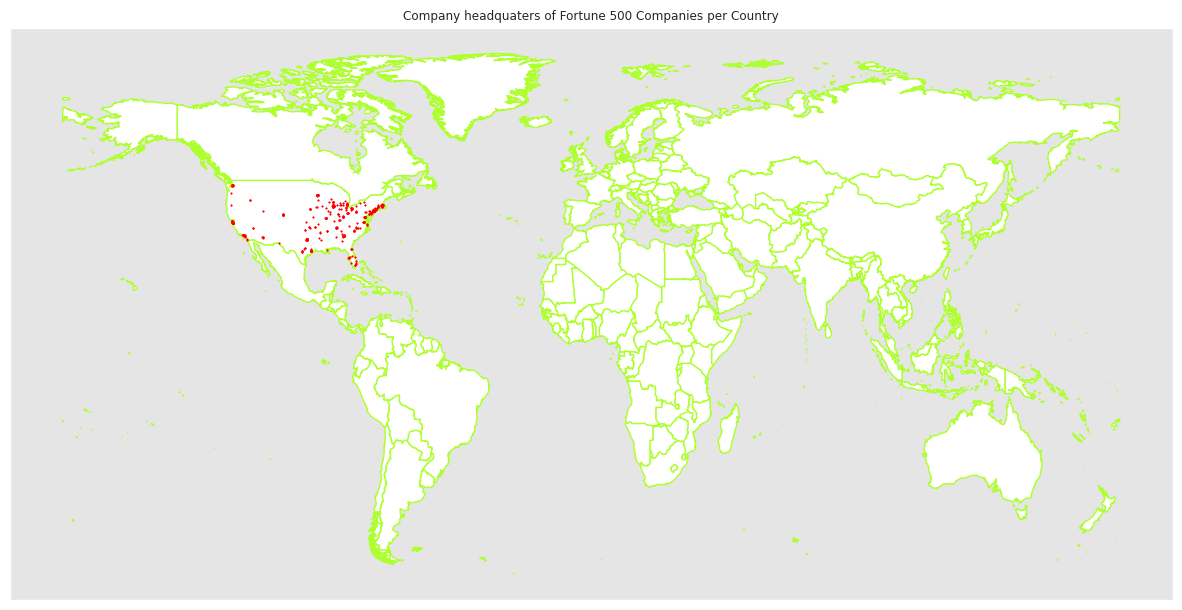

In [ ]:
fig, ax = plt.subplots(1,figsize=(15,15))
world_boundaries.plot(ax=ax, color='white', edgecolor='greenyellow',linewidth=1)
Fortune_500_geo.plot(ax=ax,color='red', markersize=1)
ax.title.set_text("Company headquaters of Fortune 500 Companies per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

# **PS2**

### ***PROJECT***

In this project we will see the graphical representation of Fortune companies in USA with respect there revenues, profits, number of employees in each organization.
We will see the relationship between different sectors and company sectors with the no of women CEO's. Later we will also see the number of full time/part time jobs that are open with each sector in New york with there respective addresses  

In [4]:
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
plt.style.use('ggplot')
from geopy.geocoders import Nominatim
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
import plotly.figure_factory as ff
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec
import nltk
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import urllib.request
import random

In [5]:
!pip install squarify
import squarify

<Axes: >

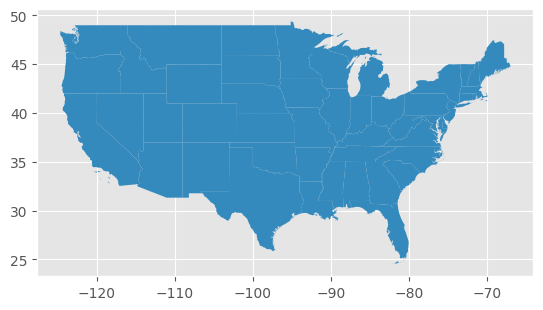

In [6]:
! wget -q -O us_state.zip https://docs.google.com/uc?id=18UaMlNnNUXeoLAmfWQ8JYWoT7bprJdC4&export=download

zip_ref = zipfile.ZipFile('us_state.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
us_map=gpd.read_file('cb_2018_us_state_500k.shp') #load the shapefile with gpd as world_boundaries
us_cont = us_map[~us_map['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
us_cont.plot()

In [7]:
us_cont.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [8]:
! wget -q -O Fortune_1000.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/Fortune_1000.csv

Fortune_1000 = pd.read_csv("Fortune_1000.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
Fortune_1000.dataframeName = 'Fortune_1000.csv'
nRow, nCol = Fortune_1000.shape
print(f'There are {nRow} rows and {nCol} columns')
#Fortune_1000_Dataset.head() #Displaying rows

There are 1000 rows and 18 columns


In [9]:
# Preview data set in order to identify any null values and errors.
print(Fortune_1000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [10]:
# Remove white space around column names. Convert all column names into lowercase.
Fortune_1000.columns = Fortune_1000.columns.str.strip().str.lower()

In [11]:
# Private corporations have null values in the 'ticker symbol' column. Null values are replaced with N/A in to prevent any errors during analysis
Fortune_1000['ticker'].fillna('N/A', inplace= True)

In [13]:
Fortune_1000

company  rank  rank_change   revenue   profit  \
0               Walmart     1          0.0  572754.0  13673.0   
1                Amazon     2          0.0  469822.0  33364.0   
2                 Apple     3          0.0  365817.0  94680.0   
3            CVS Health     4          0.0  292111.0   7910.0   
4    UnitedHealth Group     5          0.0  287597.0  17285.0   
..                  ...   ...          ...       ...      ...   
995       Vizio Holding   996          0.0    2124.0    -39.4   
996   1-800-Flowers.com   997          0.0    2122.2    118.7   
997               Cowen   998          0.0    2112.8    295.6   
998             Ashland   999          0.0    2111.0    220.0   
999            DocuSign  1000          0.0    2107.2    -70.0   

     num. of employees       sector           city state newcomer ceo_founder  \
0            2300000.0    Retailing    Bentonville    AR       no          no   
1            1608000.0    Retailing        Seattle    WA       no          no   
2             154000.0   Technology      Cupertino    CA       no          no   
3             258000.0  Health Care     Woonsocket    RI       no          no   
4             350000.0  Health Care     Minnetonka    MN       no          no   
..                 ...          ...            ...   ...      ...         ...   
995              800.0  Industrials         Irvine    CA       no         yes   
996             4800.0    Retailing        Jericho    NY       no          no   
997             1534.0   Financials       New York    NY       no          no   
998             4100.0    Chemicals     Wilmington    DE       no          no   
999             7461.0   Technology  San Francisco    CA       no          no   

    ceo_woman profitable prev_rank                    ceo  \
0          no        yes       1.0    C. Douglas McMillon   
1          no        yes       2.0        Andrew R. Jassy   
2          no        yes       3.0        Timothy D. Cook   
3         yes        yes       4.0            Karen Lynch   
4          no        yes       5.0        Andrew P. Witty   
..        ...        ...       ...                    ...   
995        no         no                  William W. Wang   
996        no        yes            Christopher G. McCann   
997        no        yes                  Jeffrey Solomon   
998        no        yes                   Guillermo Novo   
999        no         no                Allan C. Thygesen   

                           website ticker market cap  
0    https://www.stock.walmart.com    WMT     352037  
1                   www.amazon.com   AMZN    1202717  
2                    www.apple.com   AAPL    2443962  
3        https://www.cvshealth.com    CVS     125204  
4        www.unitedhealthgroup.com    UNH     500468  
..                             ...    ...        ...  
995          https://www.vizio.com   VZIO     1705.1  
996    https://www.1800flowers.com   FLWS        830  
997          https://www.cowen.com   COWN       1078  
998        https://www.ashland.com    ASH     5601.9  
999       https://www.docusign.com   DOCU    21302.8  

[1000 rows x 18 columns]

In [15]:
Fortune_1000[['profit']]

profit
0    13673.0
1    33364.0
2    94680.0
3     7910.0
4    17285.0
..       ...
995    -39.4
996    118.7
997    295.6
998    220.0
999    -70.0

[1000 rows x 1 columns]

In [12]:
#aok: not sure about these--so you fill profit with 0? why? same for the other 2???

#Replace null values for the CEO column.
Fortune_1000['ceo'].fillna('N/A', inplace = True)
Fortune_1000['profit'] = Fortune_1000['profit'].fillna(value = 0)
Fortune_1000['num. of employees'] = Fortune_1000['num. of employees'].fillna(value = 0)
Fortune_1000['market cap'] = Fortune_1000['market cap'].fillna(value = 0)

In [ ]:
Fortune_1000['market cap']=Fortune_1000['market cap'].replace(['-'], '0') #same here: missing is not 0!!!

In [16]:
#Added missing profit values for the company Hexion.
print(Fortune_1000.loc[Fortune_1000['company']== 'Hexion'])
Fortune_1000.at[716,'profit'] = -230

Empty DataFrame
Columns: [company, rank, rank_change, revenue, profit, num. of employees, sector, city, state, newcomer, ceo_founder, ceo_woman, profitable, prev_rank, ceo, website, ticker, market cap]
Index: []


In [ ]:
# Removed iheartmedia from dataframe as missing information could not be located for the company.
print(Fortune_1000.loc[Fortune_1000['company']== 'iHeartMedia'])
Fortune_1000= Fortune_1000.drop(Fortune_1000.index[667])

         company  rank  rank_change  revenue  profit  num. of employees  \
741  iHeartMedia   742          0.0   3558.3  -159.2             9990.0   

    sector         city state newcomer ceo_founder ceo_woman profitable  \
741  Media  San Antonio    TX       no          no        no         no   

    prev_rank                ceo                      website ticker  \
741            Robert W. Pittman  https://www.iheartmedia.com   IHRT   

    market cap  
741     2728.1  


In [ ]:
# Change the datatype in the profit column to numerical.
Fortune_1000['profit']= Fortune_1000['profit'].astype(float)
Fortune_1000['market cap']=Fortune_1000['market cap'].astype(float)

In [ ]:
# Change data types in several columns to categorical data.
Fortune_1000['ceo_woman'] = np.where(Fortune_1000['ceo_woman'] == 'yes', True, False)
Fortune_1000['ceo_founder']=np.where(Fortune_1000['ceo_founder']== 'yes', True, False)
Fortune_1000['newcomer']= np.where(Fortune_1000['newcomer']== 'yes', True, False)
Fortune_1000['profitable']=np.where(Fortune_1000['profitable']=='yes', True, False)

In [ ]:
# Check for anymore null values.
Fortune_1000.isnull().any()

company              False
rank                 False
rank_change          False
revenue              False
profit               False
num. of employees    False
sector               False
city                 False
state                False
newcomer             False
ceo_founder          False
ceo_woman            False
profitable           False
prev_rank            False
ceo                  False
website              False
ticker               False
market cap           False
dtype: bool

In [ ]:
#Check to make sure data types where updated properly.
print(Fortune_1000.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            999 non-null    object 
 1   rank               999 non-null    int64  
 2   rank_change        999 non-null    float64
 3   revenue            999 non-null    float64
 4   profit             999 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             999 non-null    object 
 7   city               999 non-null    object 
 8   state              999 non-null    object 
 9   newcomer           999 non-null    bool   
 10  ceo_founder        999 non-null    bool   
 11  ceo_woman          999 non-null    bool   
 12  profitable         999 non-null    bool   
 13  prev_rank          999 non-null    object 
 14  ceo                999 non-null    object 
 15  website            999 non-null    object 
 16  ticker             999 non

## Where are most Fortune 1000 companies

In [ ]:
state_count= Fortune_1000[['sector','company','state']]
state_count = state_count.groupby(["state"], as_index = False)["company"].count()
state_count.rename(columns = {'company':'company_count'}, inplace=True)
state_count.sort_values(by='company_count',ascending=False,inplace=True)
state_count.head(10)

state  company_count
3     CA            131
40    TX             97
31    NY             87
13    IL             62
32    OH             54
35    PA             45
8     FL             38
42    VA             34
9     GA             34
18    MA             33

In [ ]:
us_cont['STUSPS'] = us_cont['STUSPS'].str.upper().str.replace(' ', '') #making the column data similar to the other data to merge on this column
Fortune_1000['state'] = Fortune_1000['state'].str.upper().str.replace(' ', '') #turning the column data to upper case and replacing special charaters with no space

In [ ]:
us_cont = us_cont.rename(columns = {'STUSPS':'state'}) #replacing the column name to create merge
us_cont.columns #printing the column names after renaming

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'state', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [ ]:
Fortune_outer_join = pd.merge(us_cont, state_count, on = 'state', how = 'outer', indicator = False) #outer merge

In [ ]:
Fortune_outer_join[['state','company_count']]

state  company_count
0     MS            1.0
1     NC           28.0
2     OK            8.0
3     VA           34.0
4     WV            NaN
5     LA            5.0
6     MI           31.0
7     MA           33.0
8     ID            4.0
9     FL           38.0
10    NE            7.0
11    WA           17.0
12    NM            NaN
13    SD            NaN
14    TX           97.0
15    CA          131.0
16    AL            3.0
17    GA           34.0
18    PA           45.0
19    MO           21.0
20    CO           21.0
21    UT            5.0
22    TN           22.0
23    WY            NaN
24    NY           87.0
25    KS            4.0
26    NV           10.0
27    IL           62.0
28    VT            1.0
29    MT            NaN
30    IA            5.0
31    SC            3.0
32    NH            2.0
33    AZ           20.0
34    DC            5.0
35    NJ           23.0
36    MD            8.0
37    ME            2.0
38    DE            9.0
39    RI            7.0
40    KY            6.0
41    OH           54.0
42    WI           21.0
43    OR            5.0
44    ND            1.0
45    AR            6.0
46    IN           19.0
47    MN           27.0
48    CT           24.0
49    HI            2.0
50    PR            1.0

In [ ]:
Fortune_outer_join['company_count'] = Fortune_outer_join['company_count'].fillna(value = 0)

In [ ]:
Fortune_outer_join[['state','company_count']]

state  company_count
0     MS            1.0
1     NC           28.0
2     OK            8.0
3     VA           34.0
4     WV            0.0
5     LA            5.0
6     MI           31.0
7     MA           33.0
8     ID            4.0
9     FL           38.0
10    NE            7.0
11    WA           17.0
12    NM            0.0
13    SD            0.0
14    TX           97.0
15    CA          131.0
16    AL            3.0
17    GA           34.0
18    PA           45.0
19    MO           21.0
20    CO           21.0
21    UT            5.0
22    TN           22.0
23    WY            0.0
24    NY           87.0
25    KS            4.0
26    NV           10.0
27    IL           62.0
28    VT            1.0
29    MT            0.0
30    IA            5.0
31    SC            3.0
32    NH            2.0
33    AZ           20.0
34    DC            5.0
35    NJ           23.0
36    MD            8.0
37    ME            2.0
38    DE            9.0
39    RI            7.0
40    KY            6.0
41    OH           54.0
42    WI           21.0
43    OR            5.0
44    ND            1.0
45    AR            6.0
46    IN           19.0
47    MN           27.0
48    CT           24.0
49    HI            2.0
50    PR            1.0

<Axes: >

[]

[]

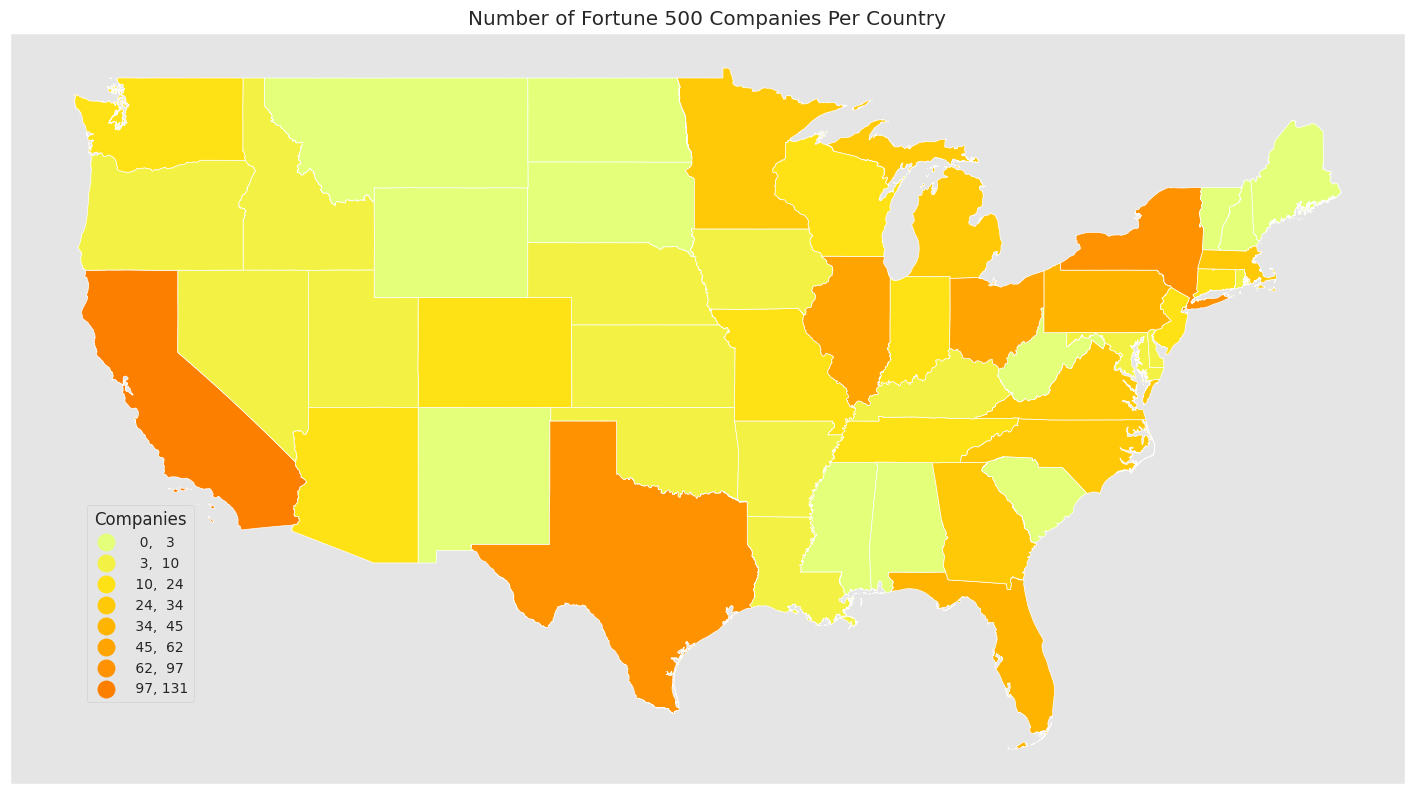

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
Fortune_outer_join.plot(ax=ax,
                        column='company_count',
                        legend=True,
                        cmap='Wistia',
                        scheme='natural_breaks',
                        k=8,
                        edgecolor='w',
                        linewidth=0.5,
                        legend_kwds= {'bbox_to_anchor': (0.05, 0.1),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':10,'loc':'lower left'})

leg1 = ax.get_legend()
leg1.set_title("Companies")
ax.title.set_text("Number of Fortune 500 Companies Per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

The data shows that California, Texas, and New York are the states with the most Fortune 1000 companies. These three states are also amongst the most populated states in the United States, which each state having over 19 million residents. It makes sense for businesses to be in highly populated regions like California and New York. It is easier to find talent in populous cities as well as a large pool of clients. California and New York are known for high housing costs and taxes. This has led many businesses to move to states like Texas and Florida

## How many companies have women CEOs

In [ ]:
woman_df = Fortune_1000[['sector','company','ceo_woman']]
woman_df = Fortune_1000[Fortune_1000['ceo_woman']==True]
woman_df=woman_df.groupby(["sector"], as_index=False)[
    "ceo_woman"].count().sort_values(by='ceo_woman',ascending=False)
woman_df

sector  ceo_woman
16                      Retailing         14
6                      Financials         12
4                          Energy          9
9                     Health Care          9
17                     Technology          7
0             Aerospace & Defense          4
11             Household Products          4
13                      Materials          4
12                    Industrials          4
18                 Transportation          2
10  Hotels, Restaurants & Leisure          2
8       Food, Beverages & Tobacco          2
7              Food & Drug Stores          2
2               Business Services          2
1                         Apparel          1
14                          Media          1
15         Motor Vehicles & Parts          1
5      Engineering & Construction          1
3                       Chemicals          1
19                    Wholesalers          1

From the one thousand companies that are feature in Fortune’s list, a mere 8% of those companies have a woman CEO.

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Number of Women CEOs per Sector')

Text(3, 10, '\n    In the Fortune 1000 list of companies,\n    only 8.0% of the CEOs are women\n    and 17.0% of those women are in the retail sector.\n    ')

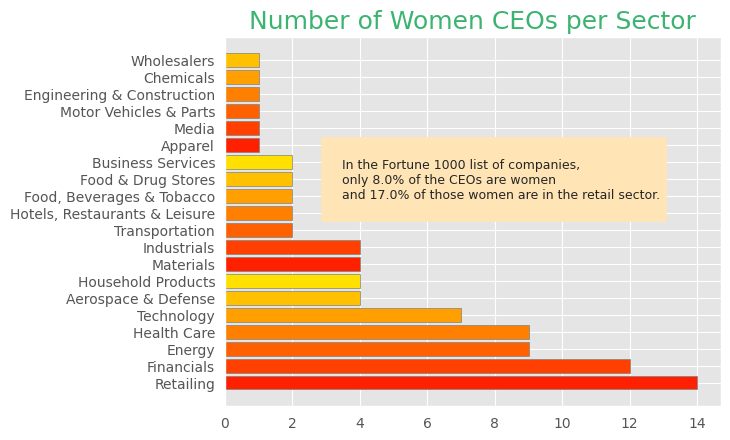

In [ ]:
y = woman_df['sector']
width = woman_df['ceo_woman']
palette = sns.color_palette("autumn", 7)
plt.barh(y=y, width=width, color=palette, edgecolor='Gray')
plt.title('Number of Women CEOs per Sector', fontsize=18,
          color = 'MediumSeaGreen')
percent_woman = round((woman_df['ceo_woman'].sum()/1000 *100),0)
percent_retail = round((woman_df.iloc[0,1]/woman_df['ceo_woman'].sum()*100),0)
plt.annotate(text=(
    '''
    In the Fortune 1000 list of companies,
    only {pw}% of the CEOs are women
    and {pr}% of those women are in the retail sector.
    '''.format(
      pw=percent_woman, pr=percent_retail)), xy=(3,10), fontsize=9,
backgroundcolor='Moccasin')

Jane Fraser, Chief Executive Officer of Citi, is the first woman CEO in the firm’s history. The finance company serves millions of consumers, businesses, and institutions across 160 countries. Jane Fraser has been with Citi for 17 years before being appointed as CEO [4]. Safra A. Catz has served as chief executive officer of Oracle Corporation since 2014. She began working at Oracle in 1999 [5]. Interestingly, Oracle is one of the many tech companies that moved its headquarters from California to Austin, Texas. Mary T. Barra is the only woman CEO in the dataset within the motor vehicles sector. Barra has been the chair and chief executive officer of General Motors since January 15, 2014. She has been with General Motors for more than thirty years and the CEO for over seven years [6]. More diversity is necessary in the business world. Although the number of women running Fortune 500 businesses hit a record in 2021, there is still a very large gap between the number of men that are CEOs (93%) and the number of women that are CEOs. As for racial diversity, this year marks the first time that two Black women, Roz Brewer and Thasunda Brown, are running Fortune 500 businesses [7]. Before being appointed the CEO of Walgreens Boots Alliance, Roz Brewer served as the COO of Starbucks and CEO of Sam’s Club [8]. Accomplished businesswoman, Thasunda Brown Duckett, was the CEO of Chase Consumer Banking for over four years. In May 2021, she became the CEO of the Teachers Insurance and Annuity Association of America (TIAA) [9].

In [ ]:
woman_ceo = Fortune_1000[['company','profit','sector','ceo_woman','ceo']]
woman_ceo = woman_ceo[woman_ceo['ceo_woman']== True].sort_values(by='profit', ascending=False)
woman_ceo.head(10)

company   profit                  sector  ceo_woman  \
43               Citigroup  21952.0              Financials       True   
90                  Oracle  13746.0              Technology       True   
33   United Parcel Service  12890.0          Transportation       True   
24          General Motors  10019.0  Motor Vehicles & Parts       True   
3               CVS Health   7910.0             Health Care       True   
100       Northrop Grumman   7005.0     Aerospace & Defense       True   
19         Elevance Health   6104.0             Health Care       True   
89                    TIAA   4060.7              Financials       True   
144            Duke Energy   3908.0                  Energy       True   
78             Progressive   3350.9              Financials       True   

                         ceo  
43               Jane Fraser  
90             Safra A. Catz  
33            Carol B. TomÃ©  
24             Mary T. Barra  
3                Karen Lynch  
100          Kathy J. Warden  
19         Gail K. Boudreaux  
89    Thasunda Brown Duckett  
144             Lynn J. Good  
78   Susan Patricia Griffith

## Which sectors are the most profitable
The sectors that are the most profitable within Fortune 1000 are financials, technology, and healthcare. The financial sector is made up of firms and institutions that provide financial services. Banks, investment companies and insurance companies make up the financial sector. It is important that the financial sector remains profitable as its strength is a sign of a healthy economy [10]. The most profitable company in the list is Berkshire Hathway, a conglomerate holding company. Holding companies’ primary business is holding a controlling interest in the securities of other companies [11]. It is no surprise that the technology sector is rapidly growing in the United States. The technology sector is comprised of companies that develop software and companies that provide information technology consulting and services. According to Fidelity Investments, the tech sector has increased 265.67% over the last five years

In [ ]:
# Top performing Sector
sector_df=Fortune_1000[['company','profit','sector']]
sector_sum_df=sector_df.groupby(['sector'], as_index = False).sum('profit').sort_values(
    by=['profit'], ascending = False)

sector_sum_df.rename(columns = {
    'sector':'sector',
    'profit':'sum_profit'}, inplace = True)
sector_profit = sector_sum_df
sector_sum_df = sector_sum_df.head(5)

sector_sum_df.head(3)

sector  sum_profit
6    Financials    556324.0
17   Technology    459503.3
9   Health Care    209021.4

<Axes: >

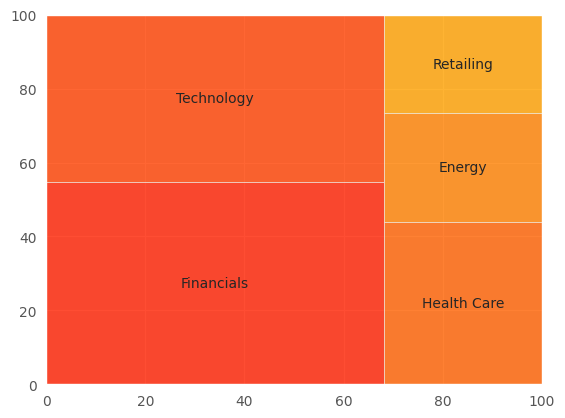

In [ ]:
squarify.plot(sizes=sector_sum_df['sum_profit'],
              label=sector_sum_df['sector'],
              alpha=0.8,
              text_kwargs={'fontsize':10},
              color=palette)

Conclusion

Analyzing the companies featured in the Fortune 1000 list is a great way to get a snapshot of our economy. Through this exploratory analysis we have identified the regions in the US that are the most popular amongst Fortune companies. Unsurprisingly, large metropolitan areas like California and New York are home to many headquarters. However, states like Texas and Florida have seen a large increase in number of corporations. While the writers at Fortune, celebrate the inclusion of more women CEOs in the business world, it is evident that there is still a large gap as companies with women CEOs only make up 7%. Lastly, we revealed that finance and technology are amongst the most profitable business sectors.

## Bar Graphs
Ploting the multiple bar graph to compare the Count by Sectors, Count by Secotors' Total revenue, Count by Sectors' Total Profit, Count by Sectors' Total Employees.

<Axes: xlabel='sector'>

<Axes: xlabel='sector'>

<Axes: xlabel='sector'>

<Axes: xlabel='sector'>

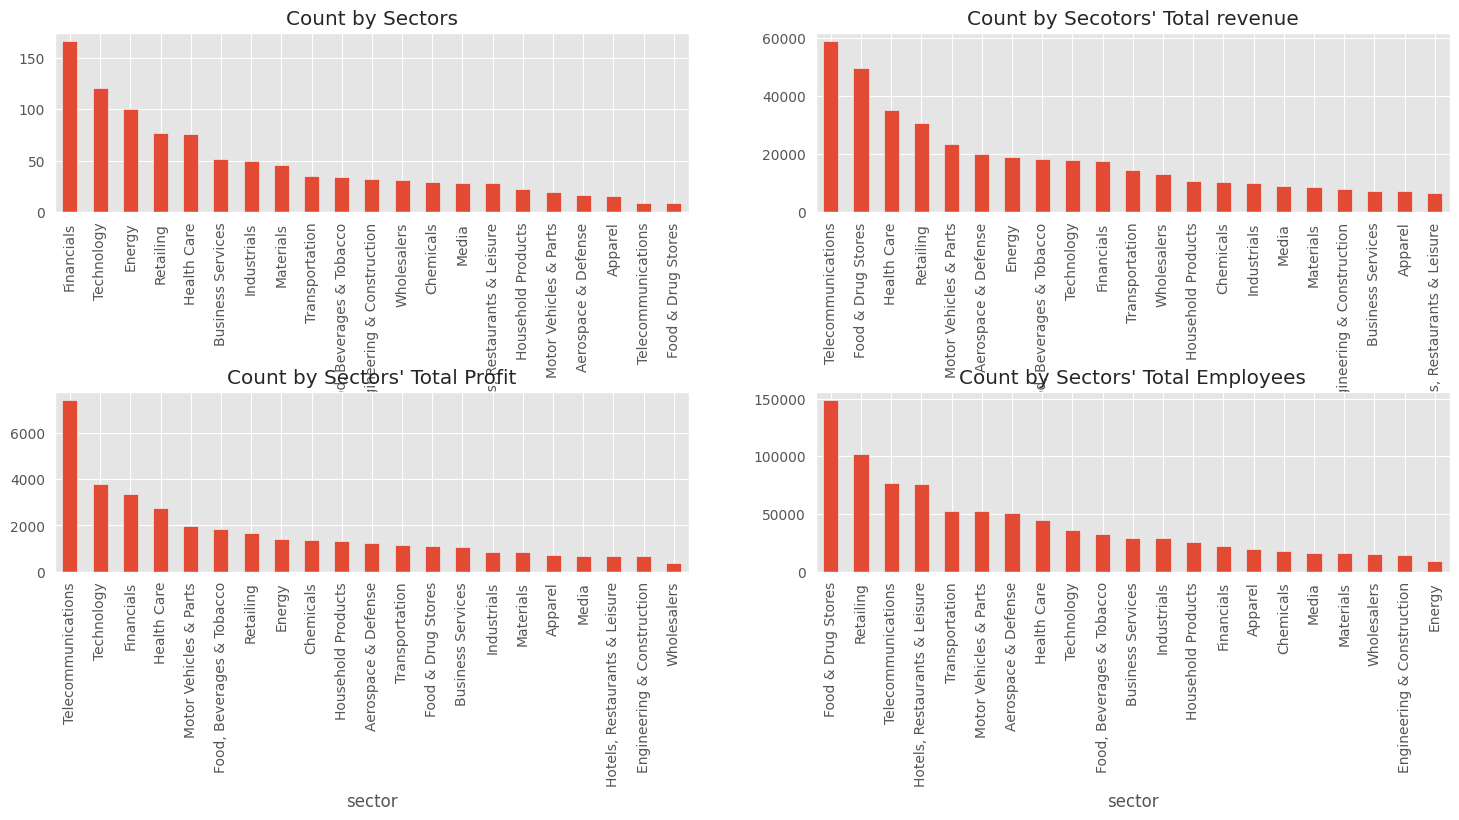

In [ ]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots( 2, 2, figsize=(18,7))
Fortune_1000.groupby('sector')['sector'].count().sort_values(ascending=False).plot.bar(ax=ax1)
Fortune_1000.groupby(['sector'])['revenue'].mean().sort_values(ascending=False).plot.bar(ax=ax2)
fig.subplots_adjust(hspace = 1)
Fortune_1000.groupby('sector')['profit'].mean().sort_values(ascending=False).plot.bar(ax=ax3)
Fortune_1000.groupby('sector')['num. of employees'].mean().sort_values(ascending=False).plot.bar(ax=ax4)
ax1.title.set_text("Count by Sectors")
ax2.title.set_text("Count by Secotors' Total revenue")
ax3.title.set_text("Count by Sectors' Total Profit")
ax4.title.set_text("Count by Sectors' Total Employees")

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


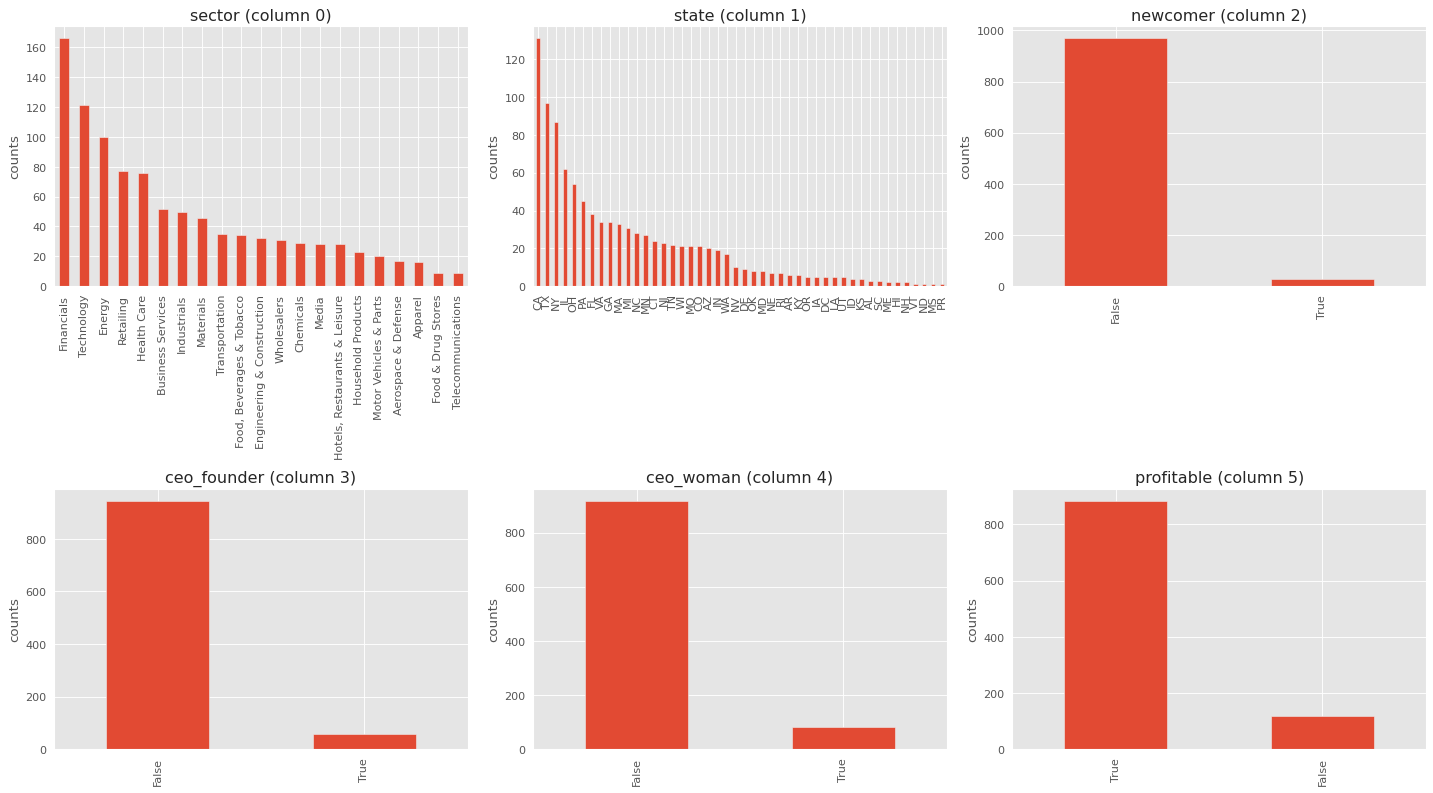

In [ ]:
plotPerColumnDistribution(Fortune_1000, 10, 3)

## Scatter plots
Scattering by number of employees with respect to revenue which is caterized by sector and the size of the scatter plots are plotted with respect to profit

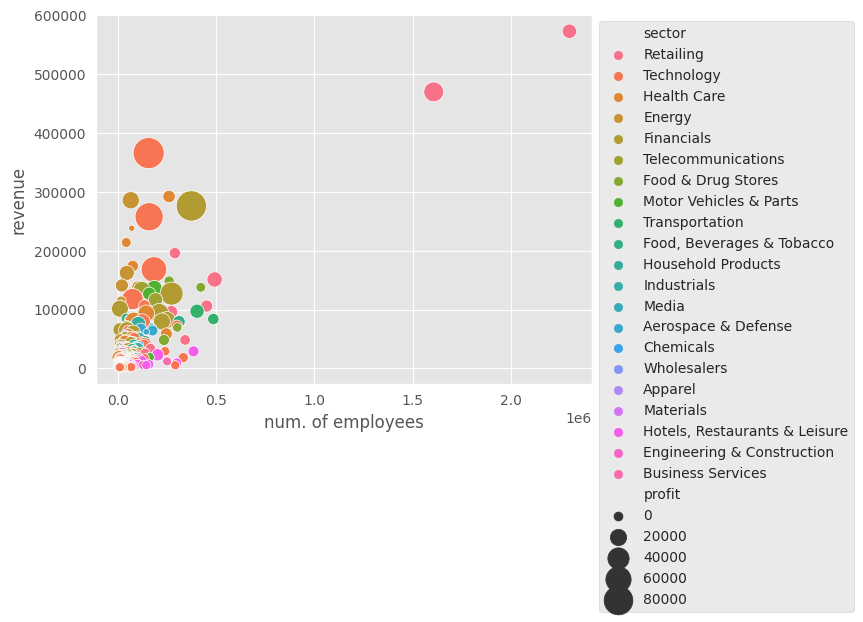

In [ ]:
ax=sns.scatterplot(x=Fortune_1000['num. of employees'],y=Fortune_1000['revenue'],hue=Fortune_1000['sector'],size=Fortune_1000['profit'],data=Fortune_1000,sizes=(10,500))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

### Clustering

Prepering the data to plot scatterplots with respective to the clustered data usind number of employees with respect to revenue which is caterized by sector and the size of the scatter plots are plotted with respect to profit

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(Fortune_1000['sector'])
Fortune_1000['sector'] = le.transform(Fortune_1000['sector'])
Fortune_1000.head()

company  rank  rank_change   revenue   profit  \
0             Walmart     1          0.0  572754.0  13673.0   
1              Amazon     2          0.0  469822.0  33364.0   
2               Apple     3          0.0  365817.0  94680.0   
3          CVS Health     4          0.0  292111.0   7910.0   
4  UnitedHealth Group     5          0.0  287597.0  17285.0   

   num. of employees  sector         city state  newcomer  ceo_founder  \
0          2300000.0      16  Bentonville    AR     False        False   
1          1608000.0      16      Seattle    WA     False        False   
2           154000.0      17    Cupertino    CA     False        False   
3           258000.0       9   Woonsocket    RI     False        False   
4           350000.0       9   Minnetonka    MN     False        False   

   ceo_woman  profitable prev_rank                  ceo  \
0      False        True       1.0  C. Douglas McMillon   
1      False        True       2.0      Andrew R. Jassy   
2      False        True       3.0      Timothy D. Cook   
3       True        True       4.0          Karen Lynch   
4      False        True       5.0      Andrew P. Witty   

                         website ticker  market cap  
0  https://www.stock.walmart.com    WMT    352037.0  
1                 www.amazon.com   AMZN   1202717.0  
2                  www.apple.com   AAPL   2443962.0  
3      https://www.cvshealth.com    CVS    125204.0  
4      www.unitedhealthgroup.com    UNH    500468.0

In [ ]:
Fortune_1000.isnull().sum()

company              0
rank                 0
rank_change          0
revenue              0
profit               0
num. of employees    0
sector               0
city                 0
state                0
newcomer             0
ceo_founder          0
ceo_woman            0
profitable           0
prev_rank            0
ceo                  0
website              0
ticker               0
market cap           0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_cluster=Fortune_1000.loc[:,['revenue','profit','num. of employees','sector','market cap']]
df_cluster=df_cluster.dropna(subset=['profit'])
pred = KMeans(n_clusters=5).fit_predict(df_cluster)
pred=pd.DataFrame(pred)
df_cluster['cluster']=pred
df_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



revenue   profit  num. of employees  sector  market cap  cluster
0    572754.0  13673.0          2300000.0      16    352037.0      2.0
1    469822.0  33364.0          1608000.0      16   1202717.0      2.0
2    365817.0  94680.0           154000.0      17   2443962.0      1.0
3    292111.0   7910.0           258000.0       9    125204.0      4.0
4    287597.0  17285.0           350000.0       9    500468.0      3.0
..        ...      ...                ...     ...         ...      ...
995    2124.0    -39.4              800.0      12      1705.1      0.0
996    2122.2    118.7             4800.0      16       830.0      0.0
997    2112.8    295.6             1534.0       6      1078.0      0.0
998    2111.0    220.0             4100.0       3      5601.9      0.0
999    2107.2    -70.0             7461.0      17     21302.8      NaN

[999 rows x 6 columns]

In [ ]:
df_cluster['cluster'].value_counts()

0.0    931
4.0     33
3.0     29
1.0      3
2.0      2
Name: cluster, dtype: int64

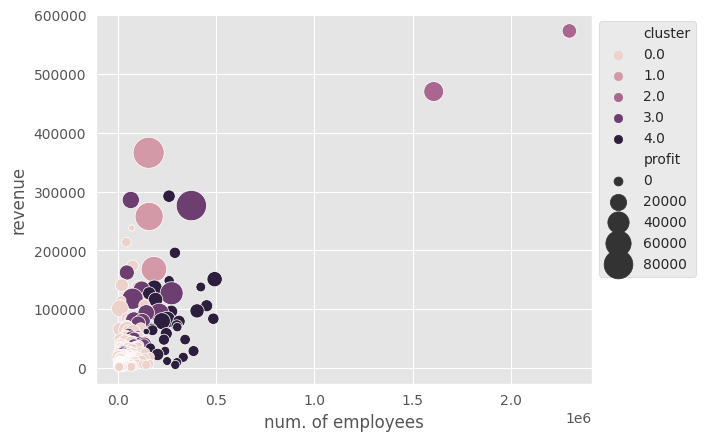

In [ ]:
ax=sns.scatterplot(x=df_cluster['num. of employees'],y=df_cluster['revenue'],hue=df_cluster['cluster'],size=df_cluster['profit'],data=df_cluster,sizes=(10,500))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

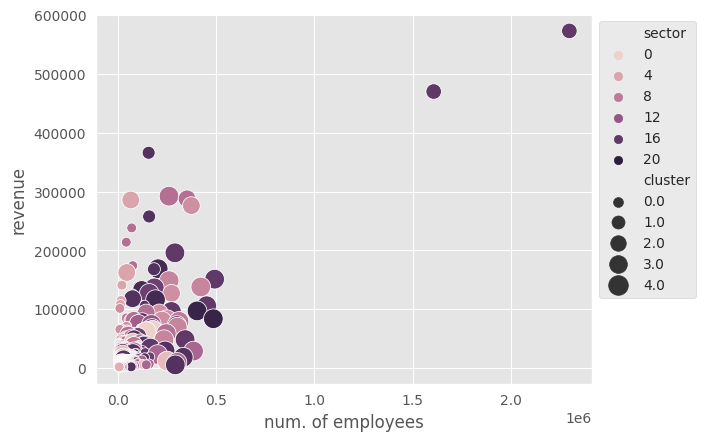

In [ ]:
ax=sns.scatterplot(x=df_cluster['num. of employees'],y=df_cluster['revenue'],hue=df_cluster['sector'],size=df_cluster['cluster'],data=df_cluster,sizes=(50,200))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

Ploting the Logorithm graph using the logarithm of the Profit

<Axes: >

Text(0.5, 1.0, 'Logarithm of the Profit')

Text(0, 0.5, 'log')

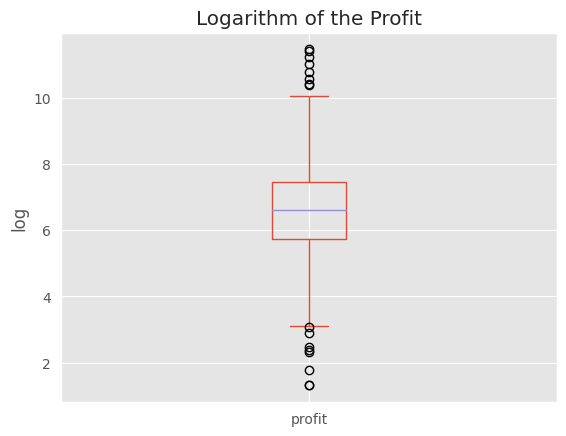

In [ ]:
np.log(Fortune_1000[Fortune_1000["profit"]>0]['profit']).plot(kind = 'box')
plt.title("Logarithm of the Profit")
plt.ylabel("log")

### Plotting the mutliple scatter and density plots

In [ ]:
def multiScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-525-b722312c272e>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



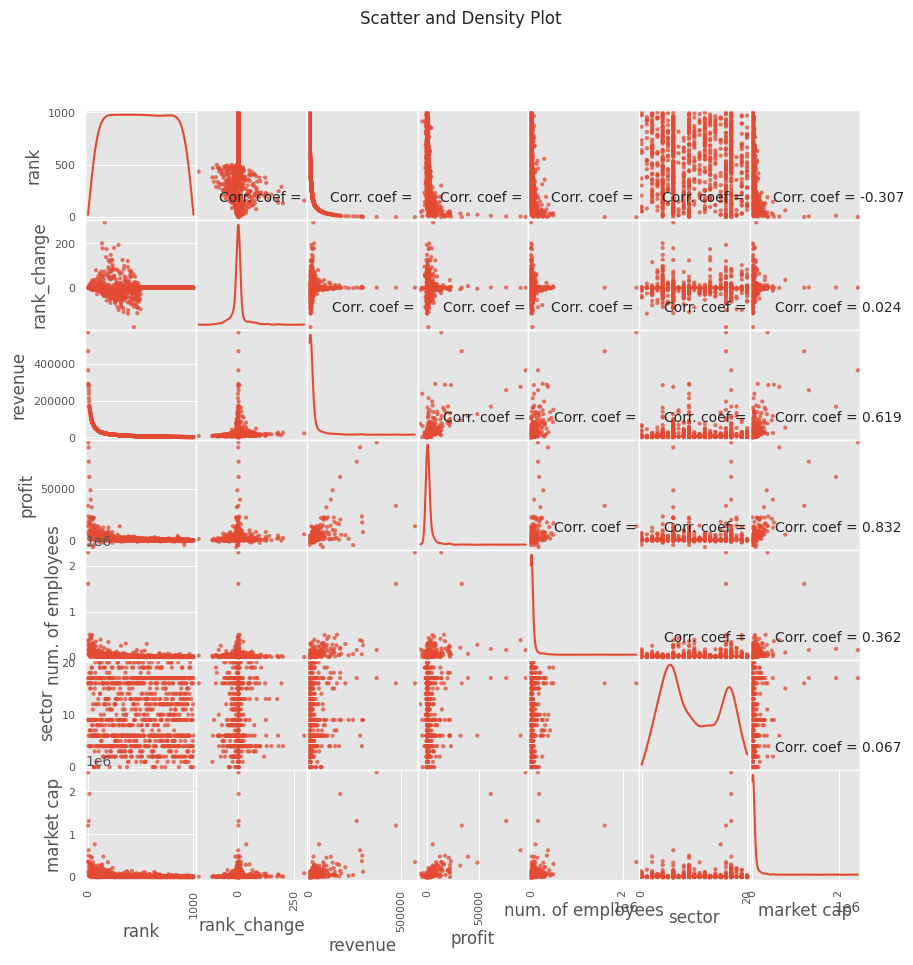

In [ ]:
multiScatterMatrix(Fortune_1000, 10, 10)

## Pie Charts

Ploting Pie chat to compare the differences in the percentages of the number of new comer, ceo founder, ceo woman, profitable

([<matplotlib.patches.Wedge at 0x7923771f7a00>,
 [Text(-1.0951083958010683, 0.10362239837994015, 'no'),
  Text(1.0951084018647097, -0.10362233429778545, 'yes')],
 [Text(-0.5973318522551281, 0.05652130820724008, '97.0%'),
  Text(0.5973318555625688, -0.05652127325333751, '3.0%')])

Text(0.5, 1.0, 'New Comer')

([<matplotlib.patches.Wedge at 0x792376958df0>,
 [Text(-1.082986830594485, 0.19271617669233831, 'no'),
  Text(1.0829868148065145, -0.1927162654143142, 'yes')],
 [Text(-0.5907200894151735, 0.10511791455945725, '94.4%'),
  Text(0.5907200808035533, -0.10511796295326227, '5.6%')])

Text(0.5, 1.0, 'CEO Founder')

([<matplotlib.patches.Wedge at 0x79237695ac20>,
 [Text(-1.062741898969366, 0.283865560036765, 'no'),
  Text(1.0627418923250125, -0.2838655849120346, 'yes')],
 [Text(-0.5796773994378359, 0.15483576002005361, '91.7%'),
  Text(0.5796773958136431, -0.15483577358838252, '8.3%')])

Text(0.5, 1.0, 'CEO Women')

([<matplotlib.patches.Wedge at 0x792376933f40>,
 [Text(1.0263795928016437, 0.39565759373520487, 'no'),
  Text(-1.026379583540609, -0.39565761775935265, 'yes')],
 [Text(0.5598434142554419, 0.21581323294647536, '11.7%'),
  Text(-0.5598434092039686, -0.21581324605055596, '88.3%')])

Text(0.5, 1.0, 'Profitable')

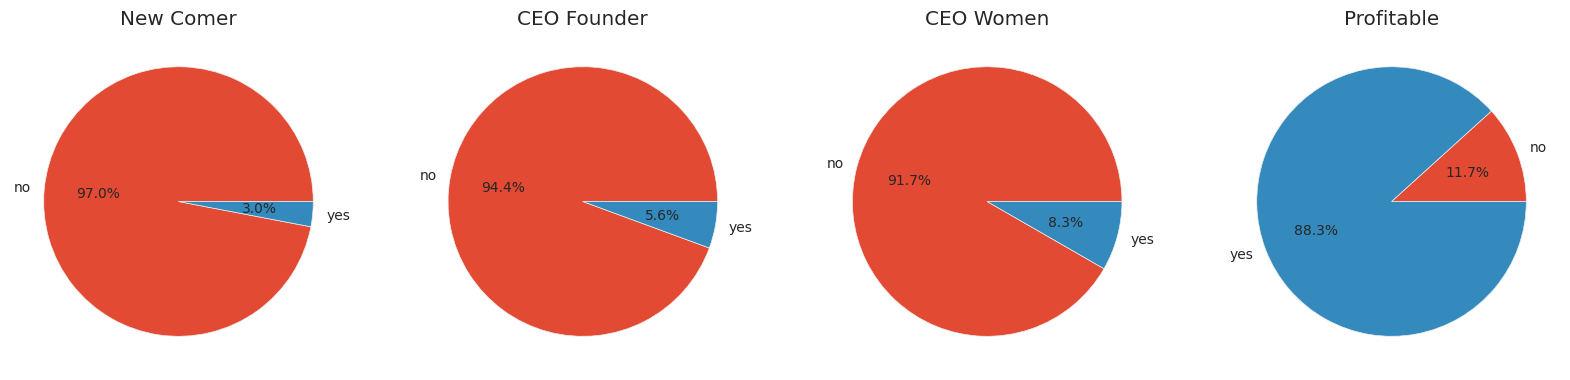

In [ ]:
fig = plt.figure(figsize=(20,20))
label1=['no','yes']
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
ax1.pie(Fortune_1000.groupby('newcomer')['newcomer'].count(),autopct="%1.1f%%",labels=label1)
ax1.set_title('New Comer')
ax2.pie(Fortune_1000.groupby('ceo_founder')['ceo_founder'].count(),autopct="%1.1f%%",labels=label1)
ax2.set_title('CEO Founder')
ax3.pie(Fortune_1000.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label1)
ax3.set_title('CEO Women')
ax4.pie(Fortune_1000.groupby('profitable')['profitable'].count(),autopct="%1.1f%%",labels=label1)
ax4.set_title('Profitable')
plt.show()

Ploting Pie chart with respect to the profit percentage of each sector

([<matplotlib.patches.Wedge at 0x7923768a6a40>,
 [Text(1.0994077484226086, 0.03609158777790647, 'Aerospace & Defense'),
  Text(1.0961227103356226, 0.09227677869588374, 'Apparel'),
  Text(1.0806737528688417, 0.2052906229236343, 'Business Services'),
  Text(1.038967207837078, 0.36131307897615095, 'Chemicals'),
  Text(0.899245954180572, 0.63352720059195, 'Energy'),
  Text(0.7144600773615954, 0.836389142598386, 'Engineering & Construction'),
  Text(-0.20885983395794405, 1.0799896155792703, 'Financials'),
  Text(-0.9659762550564167, 0.5262032636417042, 'Food & Drug Stores'),
  Text(-1.0193887721142, 0.4133358577325511, 'Food, Beverages & Tobacco'),
  Text(-1.0992106259013292, -0.04166533217926042, 'Health Care'),
  Text(-1.0163672221937416, -0.4207109098302272, 'Hotels, Restaurants & Leisure'),
  Text(-0.9812543086666753, -0.49713175489309197, 'Household Products'),
  Text(-0.918289215735884, -0.6055946798504553, 'Industrials'),
  Text(-0.8346010673537219, -0.7165480153988485, 'Materials'),

Text(0.5, 1.0, 'Profit by company')

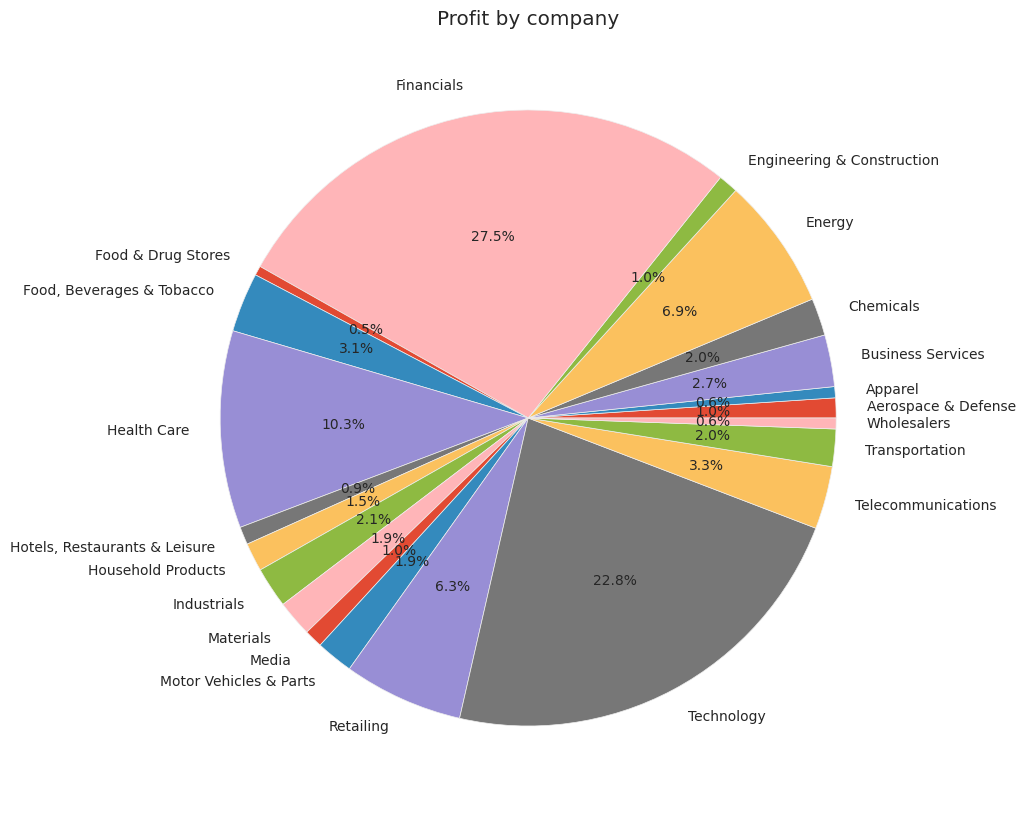

In [ ]:
x = sector_profit.groupby(['sector']).sum()['sum_profit'].index
y = sector_profit.groupby(['sector']).sum()['sum_profit'].values
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(y, labels=x,autopct="%1.1f%%")

plt.title('Profit by company')

plt.show()

## Heat Maps

Plotting Heat maps with respect to the city and the revenues, number of employees, profit, market cap of the fortune companies in that cites to compare the differences

<Axes: >

(0.0, 1.0, 0.0, 1.0)

<Axes: >

(0.0, 1.0, 0.0, 1.0)

<Axes: >

(0.0, 1.0, 0.0, 1.0)

<Axes: >

(0.0, 100.0, 0.0, 100.0)

[]

[]

[]

[]

[]

[]

[]

[]

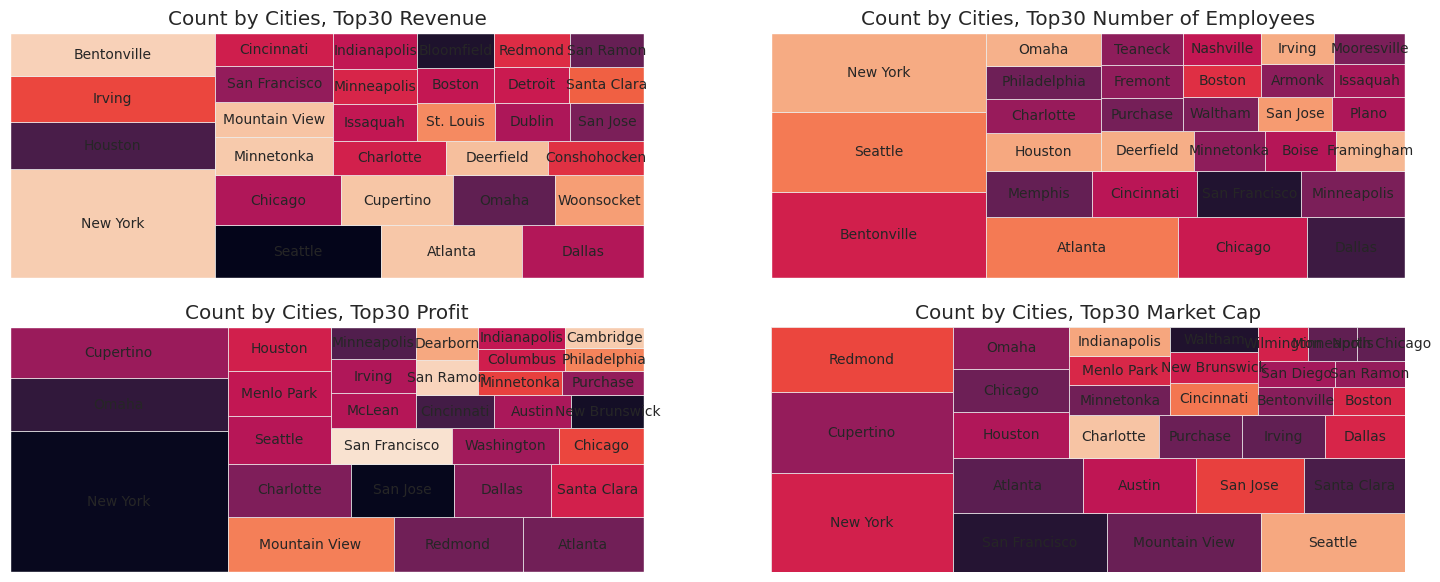

In [ ]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots( 2, 2, figsize=(18,7))

df_city_revenue=pd.DataFrame(Fortune_1000.groupby('city')['revenue'].sum().sort_values(ascending=False).head(30))

x1 = df_city_revenue['revenue']
label1 = df_city_revenue.index
squarify.plot(x1,ax= ax1, label=label1)
plt.axis('off')

df_city_employees=pd.DataFrame(Fortune_1000.groupby('city')['num. of employees'].sum().sort_values(ascending=False).head(30))

x2 = df_city_employees['num. of employees']
label2 = df_city_employees.index
squarify.plot(x2,ax= ax2, label=label2)
plt.axis('off')

df_city_profit=pd.DataFrame(Fortune_1000.groupby('city')['profit'].sum().sort_values(ascending=False).head(30))

x3 = df_city_profit['profit']
label3 = df_city_profit.index
squarify.plot(x3,ax= ax3, label=label3)
plt.axis('off')

df_city_market_cap=pd.DataFrame(Fortune_1000.groupby('city')['market cap'].sum().sort_values(ascending=False).head(30))

x4 = df_city_market_cap['market cap']
label4 = df_city_market_cap.index
squarify.plot(x4,ax= ax4, label=label4)
plt.axis('off')

ax1.title.set_text("Count by Cities, Top30 Revenue")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
ax2.title.set_text("Count by Cities, Top30 Number of Employees")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax3.title.set_text("Count by Cities, Top30 Profit")
ax3.set_xticks([]) #kills xticks
ax3.set_yticks([]) #kills xticks
ax4.title.set_text("Count by Cities, Top30 Market Cap")
ax4.set_xticks([]) #kills xticks
ax4.set_yticks([]) #kills xticks

Creating mean, maximum, minimum, standard deviation with respective to the fields profit, revenue, number of employees

In [ ]:
Fortune_1000.loc[:, ["profit","revenue","num. of employees"]].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

Dividing the webiste field

In [ ]:
df1=Fortune_1000['website'].str.split('.',expand = True)
df1

0                  1        2     3
0    https://www              stock  walmart   com
1            www             amazon      com  None
2            www              apple      com  None
3    https://www          cvshealth      com  None
4            www  unitedhealthgroup      com  None
..           ...                ...      ...   ...
995  https://www              vizio      com  None
996  https://www        1800flowers      com  None
997  https://www              cowen      com  None
998  https://www            ashland      com  None
999  https://www           docusign      com  None

[999 rows x 4 columns]

Creating heat map using the fields rank, rank change, revenue, profit, number of employees, sector, market cap

In [ ]:
def preprocess_inputs(df):

    # Drop Columns
    df_drop = df.drop(['rank', 'rank_change', 'company', 'newcomer', 'prev_rank', 'CEO', 'Website', 'Ticker'], axis=1)

    # Filling Missing value
    df_drop["profit"] = df_drop["profit"].fillna(df_drop["profit"].mean())
    df_drop["num. of employees"] = df_drop["num. of employees"].fillna(df_drop["num. of employees"].mean())

    # Encode missing values
    df_drop['Market Cap'] = df_drop['Market Cap'].replace('-',np.NaN).astype(np.float)

    # Drop missing Target
    missing_target_rows = df_drop[df_drop['Market Cap'].isna()].index
    df_drop = df_drop.drop(missing_target_rows, axis=0).reset_index(drop=True)

    # Binary encoding
    for column in ['ceo_founder', 'ceo_woman', 'profitable']:
        df_drop[column] = df_drop[column].replace({'no': 0, 'yes': 1})

    # One-hot encoding
    for column in ['sector', 'city', 'state']:
        dummies = pd.get_dummies(df_drop[column], prefix=column)
        df_drop = pd.concat([df_drop, dummies], axis=1)
        df_drop = df_drop.drop(column, axis=1)

    df1= df_drop.copy()

    # Train-test split
    X = df_drop.drop("Market Cap",axis = 1)
    y = df_drop["Market Cap"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

<Axes: >

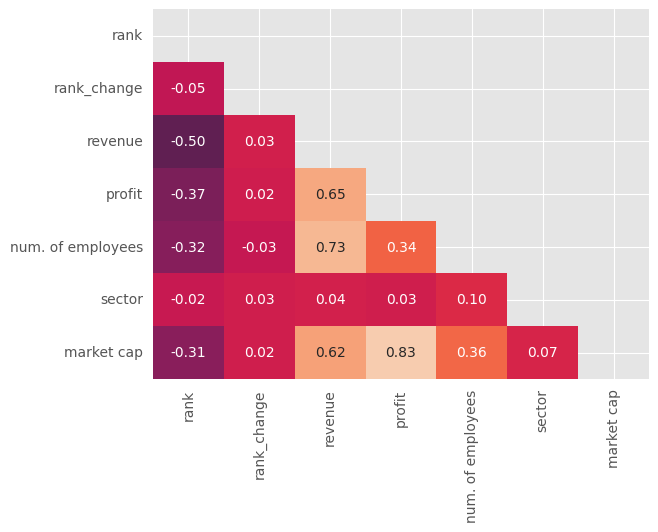

In [ ]:
corr_matrix=Fortune_1000.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cbar=False)

plt.show()

Ploting Correlation matrix using rank, rank change, revenue, profit, number of employees, sector, new comer,ceo founder, ceo woman, profitable, market cap

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for Fortune 1000')
    plt.show()

<ipython-input-534-f7cdda97042f>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

<ipython-input-534-f7cdda97042f>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



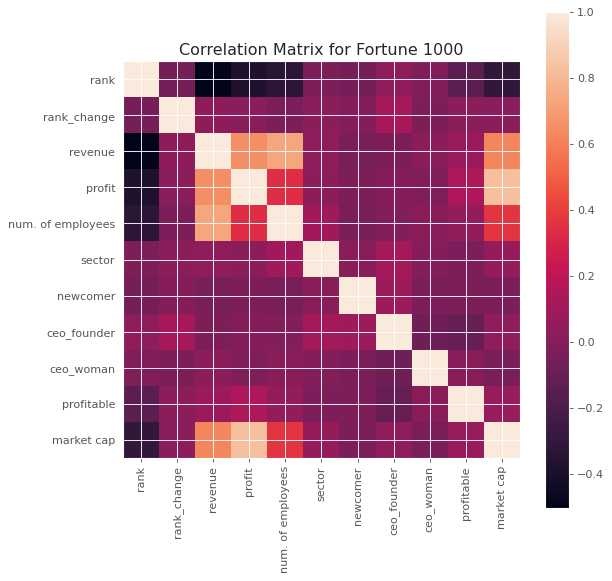

In [ ]:
plotCorrelationMatrix(Fortune_1000, 8)

<Axes: >

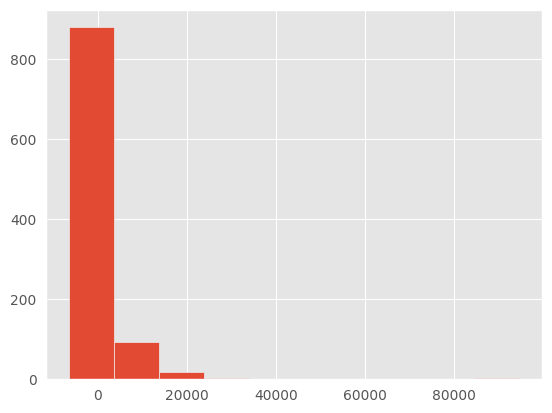

In [ ]:
# ploting Histogram using profit field
Fortune_1000['profit'].hist()

As New York always stood in top 5 for all the fields when compared revenues, number of employees, profit, market cap of the fortune companies with cities ploting the number of full time and part time jobs with respective sectors and the salaries for each position that are opened in 2022

In [ ]:
! wget -q -O NYC.zip https://docs.google.com/uc?id=1cg3dvf2upDrCMCylo6mtU0byimlE6Uvy&export=download
zip_ref = zipfile.ZipFile('NYC.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nyc_jobs=gpd.read_file('NYC_Jobs.csv') #load the shapefile with gpd as world_boundaries
nyc_jobs.head(5)

Job ID                         Agency Posting Type # Of Positions  \
0  424339  DEPT OF HEALTH/MENTAL HYGIENE     External              1   
1  379094   NYC EMPLOYEES RETIREMENT SYS     External              1   
2  520417          NYC HOUSING AUTHORITY     External              1   
3  233549   NYC EMPLOYEES RETIREMENT SYS     External              1   
4  510256        HUMAN RIGHTS COMMISSION     External              5   

                                  Business Title  \
0  Triage Nurse, Bureau of Public Health Clinics   
1          CERTIFIED IT DEVELOPER (APPLICATIONS)   
2                            Chief of Settlement   
3  CERTIFIED IT ADMINISTRATOR (LAN/WAN), LEVEL 4   
4              Associate Human Rights Specialist   

              Civil Service Title Title Classification Title Code No Level  \
0             PUBLIC HEALTH NURSE        Competitive-1         51011    03   
1         CERT IT DEVELOPER (APP)        Competitive-1         13643    02   
2        EXECUTIVE AGENCY COUNSEL    Non-Competitive-5         95005    M2   
3  CERTIFIED IT ADMINISTRATOR (LA        Competitive-1         13652    04   
4  ASSOCIATE HUMAN RIGHTS SPECIAL        Competitive-1         55038    01   

                                  Job Category  ...  \
0                                       Health  ...   
1                Technology, Data & Innovation  ...   
2                                Legal Affairs  ...   
3  Information Technology & Telecommunications  ...   
4    Constituent Services & Community Programs  ...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   
1  TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...   
2                        Click the Apply Now button.   
3  Click the 'apply now' button to apply.  Please...   
4  For City employees: Go to Employee Self-Servic...   

                                         Hours/Shift  Work Location 1  \
0                                                                       
1                                                                       
2                                                                       
3                                                                       
4  : DAY, 9-5; ON OCCASION, CANDIDATES MAY BE REQ...  22 Reade St, Ny   

  Recruitment Contact                              Residency Requirement  \
0                      New York City Residency is not required for th...   
1                      New York City Residency is not required for th...   
2                                   NYCHA has no residency requirements.   
3                      New York City Residency is not required for th...   
4                      New York City residency is generally required ...   

  Posting Date Post Until Posting Updated Process Date geometry  
0   03/01/2022                 04/05/2022   04/12/2022     None  
1   01/07/2019                 01/07/2019   04/12/2022     None  
2   03/28/2022                 03/28/2022   04/12/2022     None  
3   03/01/2016                 03/01/2016   04/12/2022     None  
4   12/16/2021                 12/16/2021   04/12/2022     None  

[5 rows x 31 columns]

In [ ]:
# Let's create a new dataset only contains annual salary
nyc_jobs_annual = nyc_jobs[nyc_jobs['Salary Frequency'] == 'Annual']
nyc_jobs_annual['Salary Range From'] = nyc_jobs_annual['Salary Range From'].astype(float)
nyc_jobs_annual['Salary Range To'] = nyc_jobs_annual['Salary Range To'].astype(float)

In [ ]:
# Calculate the average annual salary
nyc_jobs_annual['Average Annual Salary'] = (nyc_jobs_annual['Salary Range To'] + nyc_jobs_annual['Salary Range From']) / 2
# before making any plots, check a sample of the data for features of interest
features = ['Salary Range From','Salary Range To','Salary Frequency', 'Career Level', 'Average Annual Salary','Title Classification','Posting Type']
nyc_jobs_annual[features].head()

Salary Range From  Salary Range To Salary Frequency  \
0            84252.0          84252.0           Annual   
1            82884.0         116391.0           Annual   
2           105000.0         125000.0           Annual   
3            87203.0         131623.0           Annual   
4            58449.0          67216.0           Annual   

                Career Level  Average Annual Salary Title Classification  \
0  Experienced (non-manager)                84252.0        Competitive-1   
1  Experienced (non-manager)                99637.5        Competitive-1   
2                    Manager               115000.0    Non-Competitive-5   
3  Experienced (non-manager)               109413.0        Competitive-1   
4  Experienced (non-manager)                62832.5        Competitive-1   

  Posting Type  
0     External  
1     External  
2     External  
3     External  
4     External

Create a scatter plot to show the relationship between # of positions and average annual salary for differet career levels


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='# Of Positions', ylabel='Average Annual Salary'>

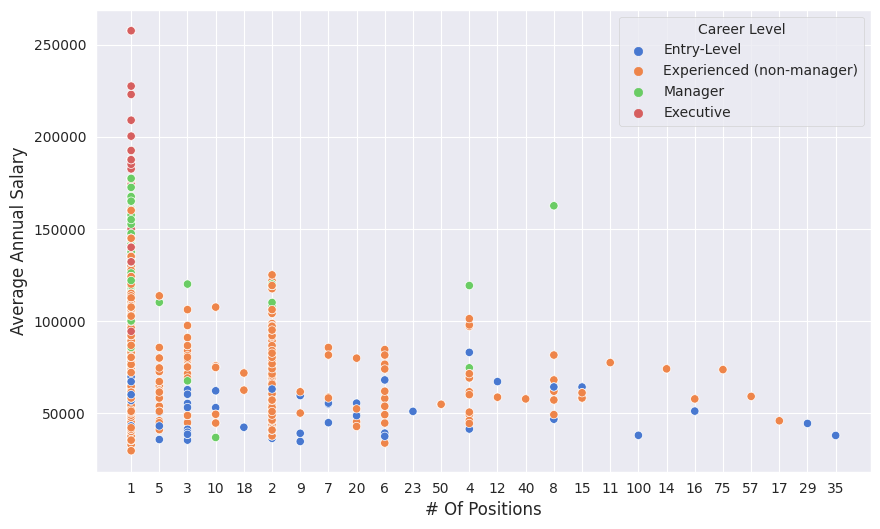

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')

hue_order = ['Entry-Level', 'Experienced (non-manager)', 'Manager', 'Executive']
sns.scatterplot(x = '# Of Positions', y = 'Average Annual Salary', data = nyc_jobs_annual, hue = 'Career Level', hue_order = hue_order, palette = 'muted', fc = 'none')

From the plot above:
There are much more entry-level, non-manager job openings than manager and executive ones.
Average annual salary increases with career levels as expected.

Next check the salary distribution for different career levels using kernel density estimate plot

<ipython-input-543-9f13192d04a9>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Average Annual Salary', ylabel='Density'>

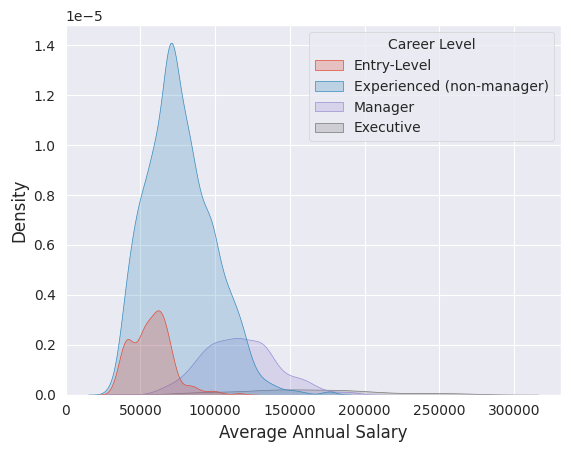

In [ ]:
sns.kdeplot(data = nyc_jobs_annual, x = 'Average Annual Salary', hue = 'Career Level', hue_order = hue_order, shade = True)

From the plot above:
There are much more entry-level, non-manager job openings than manager and executive ones.
Average annual salary increases with career levels as expected.

<Axes: xlabel='Average Annual Salary', ylabel='Count'>

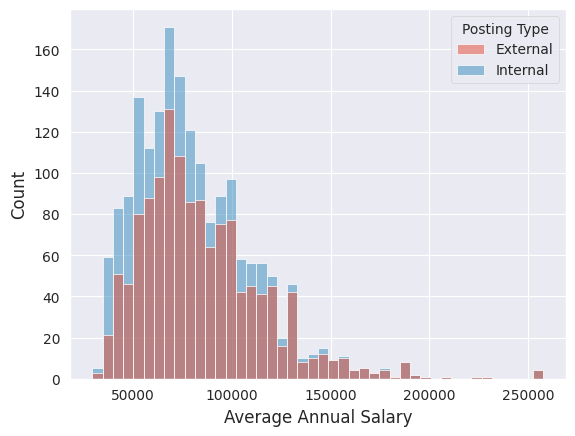

In [ ]:
sns.histplot(data = nyc_jobs_annual, x = 'Average Annual Salary', hue = 'Posting Type')

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Title Classification', ylabel='Average Annual Salary'>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Competitive-1'),
  Text(1, 0, 'Non-Competitive-5'),
  Text(2, 0, 'Pending Classification-2'),
  Text(3, 0, 'Exempt-4'),
  Text(4, 0, 'Labor-3')])

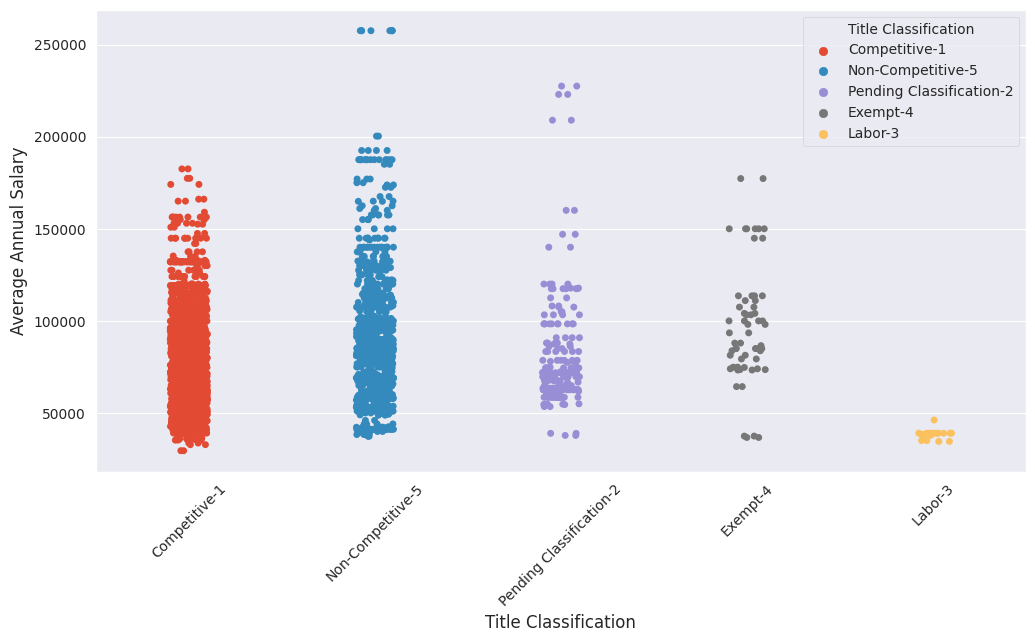

In [ ]:
plt.figure(figsize = (12,6))
sns.stripplot(data = nyc_jobs_annual, y = 'Average Annual Salary', x = 'Title Classification', hue = 'Title Classification')
plt.xticks(rotation = 45)

In [ ]:
nyc_jobs_annual['Full-Time/Part-Time indicator'].replace("","missing")

0             F
1             F
2             F
3             F
4             F
         ...   
3768    missing
3769          F
3770          F
3771          F
3772          F
Name: Full-Time/Part-Time indicator, Length: 3130, dtype: object

<Axes: xlabel='Average Annual Salary', ylabel='Count'>

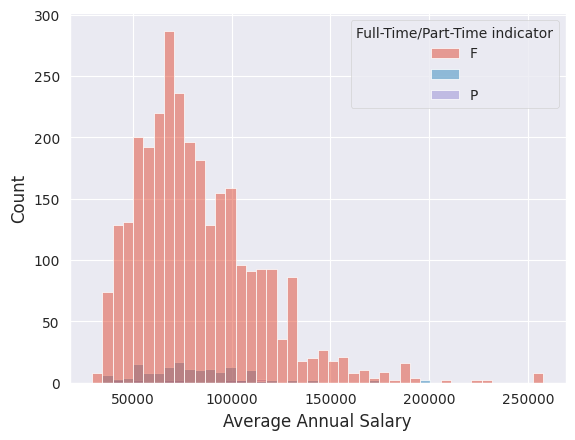

In [ ]:
sns.histplot(data = nyc_jobs_annual, x = 'Average Annual Salary', hue = 'Full-Time/Part-Time indicator')

In [ ]:
# Check how many full time jobs and how many part time jobs in the annual income dataset
nyc_jobs_annual['Full-Time/Part-Time indicator'].value_counts()

F    2964
      151
P      15
Name: Full-Time/Part-Time indicator, dtype: int64

In [ ]:
# Check how many full time jobs and how many part time jobs in the new york dataset
nyc_jobs['Full-Time/Part-Time indicator'].value_counts()

F    3379
P     231
      163
Name: Full-Time/Part-Time indicator, dtype: int64

## Word Cloud

Ploting word cloud with respective to the Minimum Qual Requirements, Job Description, Residency Requirement, Preferred Skills jobs in new york.

In [ ]:
Qual_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/XnFmbtf.png')))
skill_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/V3R3KZS.png')))
residency_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/eodMnCZ.png')))
job_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/JVuN0kA.png')))


In [ ]:
nyc_jobs['Min_req']=nyc_jobs['Minimum Qual Requirements'].apply(lambda x : x.split(',') if type(x)==str else [''])
nyc_jobs['Job_desc'] = nyc_jobs['Job Description'].apply(lambda x : x.split(',') if type(x)==str else [''])
nyc_jobs['res_req']=nyc_jobs['Residency Requirement'].apply(lambda x : x.split(',') if type(x)==str else [''])
nyc_jobs['Pref_skill'] = nyc_jobs['Preferred Skills'].apply(lambda x : x.split(',') if type(x)==str else [''])

In [ ]:
def produce_wordcloud(dataframe, title, mask):
    plt.figure(figsize=(10, 10))
    corpus=dataframe.values.tolist()
    corpus=','.join(x  for list_words in corpus for x in list_words)
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, height=1500,
                 mask = mask).generate(corpus)
    plt.axis("off")
    plt.title(title)
    return plt.imshow(wordcloud)

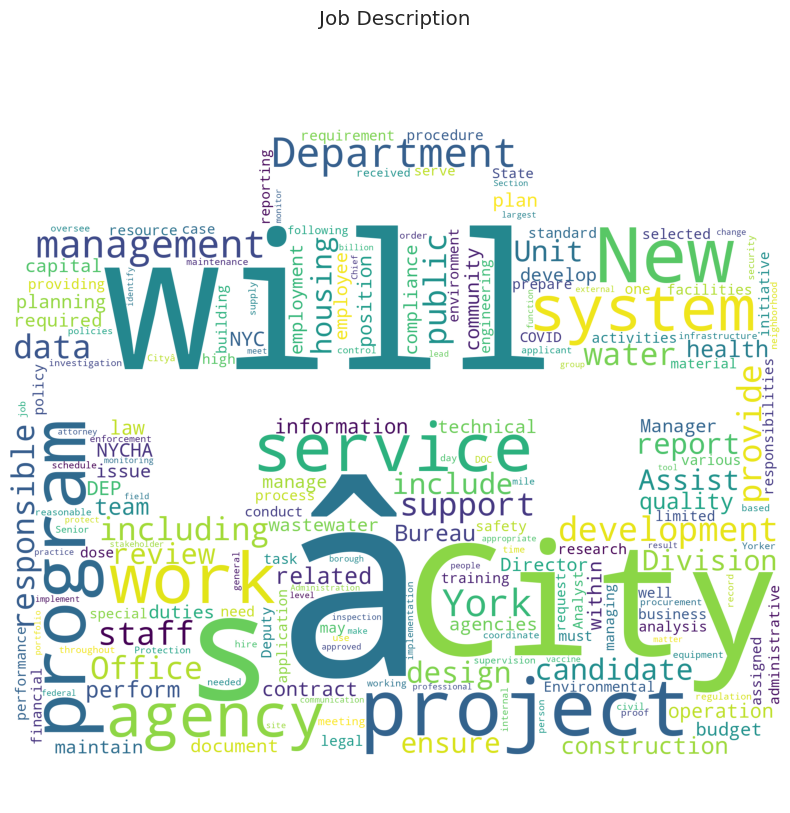

In [ ]:
produce_wordcloud(nyc_jobs['Job_desc'], "Job Description", job_mask)

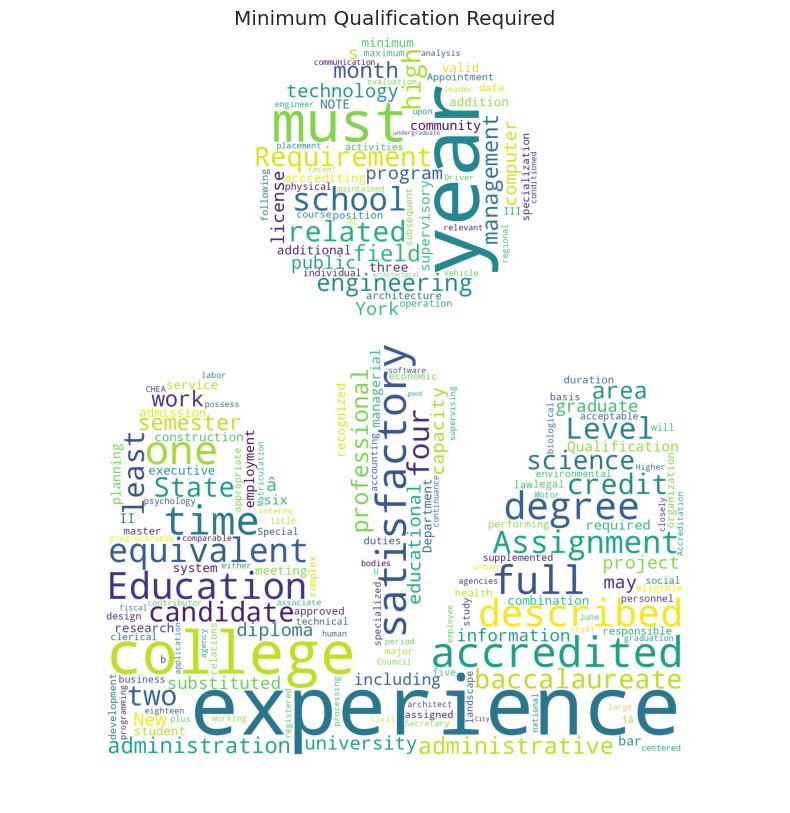

In [ ]:
produce_wordcloud(nyc_jobs['Min_req'], "Minimum Qualification Required", Qual_mask)

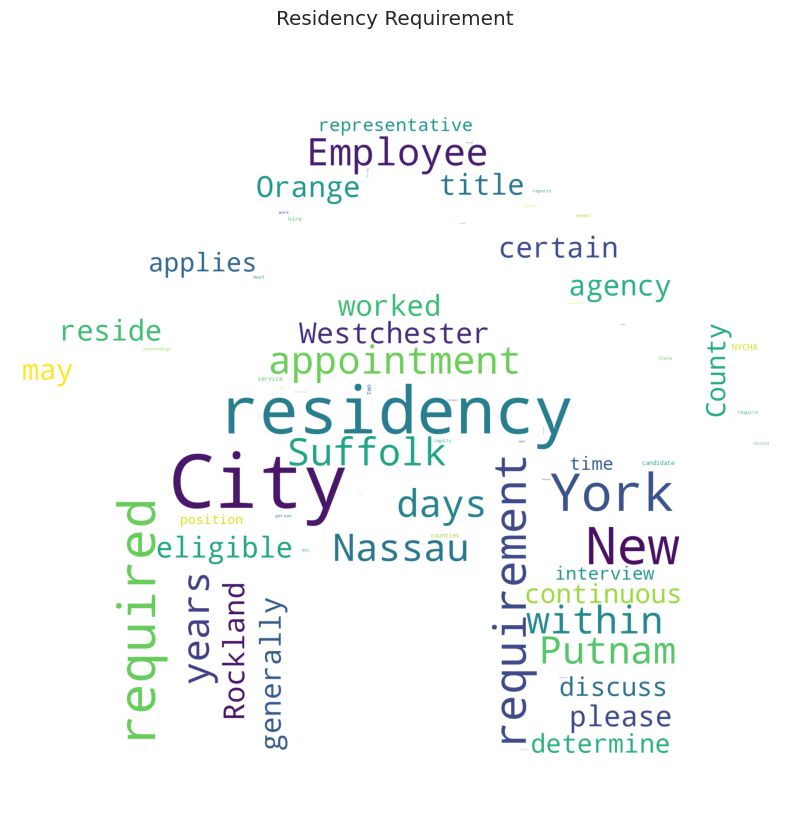

In [ ]:
produce_wordcloud(nyc_jobs['res_req'], "Residency Requirement", residency_mask)

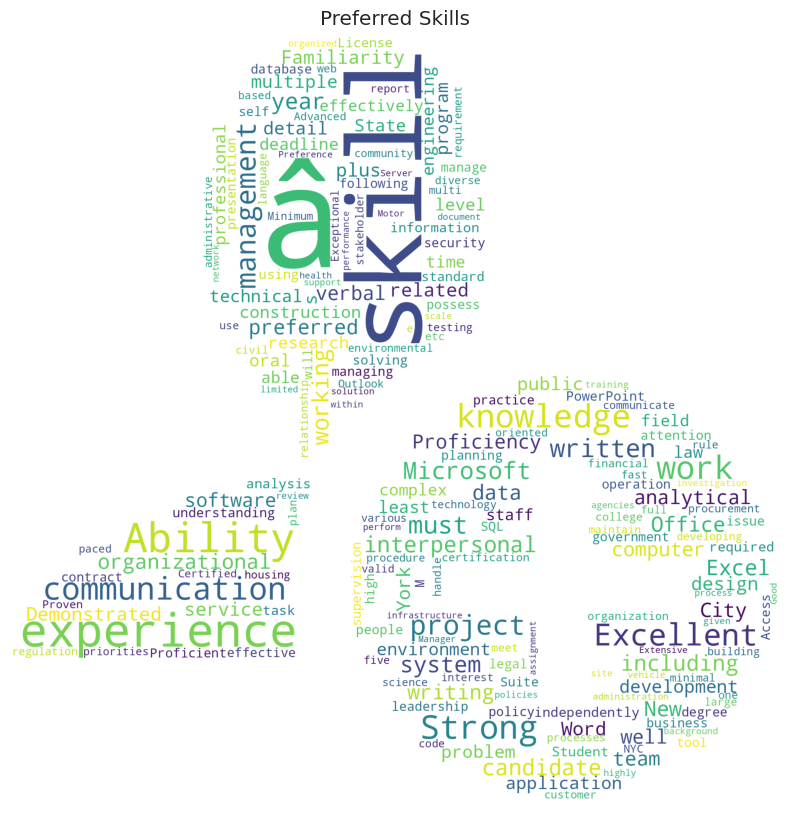

In [ ]:
produce_wordcloud(nyc_jobs['Pref_skill'], "Preferred Skills", skill_mask)